In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import datetime


### Calculate station summary
1. Mean
2. stddev
3. Bias
4. RMSE

We will also check model performance for every station. If the RMSE is lesser than the standard deviation(either in absolute or percent term) the model performance is staifactory becuase the variation of the model results is less than spread of the variable itself and errors are smaller than the natural fluctuations

In [2]:
os.chdir("C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Merge_inst_sebal_daily")
file_list=os.listdir()
data=[]
name=[]
for i in range(len(file_list)):
    data.append(pd.read_csv(file_list[i],parse_dates=["Date"]))
    name.append(file_list[i].split(".")[0])

In [29]:
#Get column names
## get average stats of all the stats
## Now the column names are not the same so we extract all cthe variations of the columns names 
## Then we basically take the most popular column name as first choice and if that doesn't work 
# we take the first element of each list. 
le=[] # this iscorrect
h=[] # this also ok
sw_in_list=[]
sw_out_list=[]
TA_list=[]
RH_list=[]
LW_IN_list=[]
LW_OUT_list=[]
NETRAD_list=[]
g=[]
swc=[]
p=[]
# inst_data=[]
# g=[] # this is wrong
for i in range(len(data)):
    inst_data=data[i].copy()
    print(data[i].copy())
    inst_data=inst_data.drop(['LE_closed', 'LE_unclosed', 
                'H_closed', 'H_unclosed',"G_unclosed","Rn_unclosed"], axis=1)
    print(inst_data)

    le.append(sorted([col for col in inst_data.columns if "LE"==col.split("_")[0]],key=len))
#     g.append(sorted([col for col in inst_data.columns if "G" in col],key=len))
    h.append(sorted([col for col in inst_data.columns if "H"==col.split("_")[0]],key=len))
    g.append(sorted([col for col in inst_data.columns if "G"==col.split("_")[0]],key=len))
    sw_in_list.append(sorted([col for col in inst_data.columns if "SW_IN" in col],key=len))
    sw_out_list.append(sorted([col for col in inst_data.columns if "SW_OUT" in col],key=len))
    TA_list.append(sorted([col for col in inst_data.columns if col.startswith("TA_")],key=len))
    RH_list.append(sorted([col for col in inst_data.columns if "RH"==col.split("_")[0]],key=len))
    LW_IN_list.append(sorted([col for col in inst_data.columns if "LW_IN" in col],key=len))
    LW_OUT_list.append(sorted([col for col in inst_data.columns if "LW_OUT" in col],key=len))
    NETRAD_list.append(sorted([col for col in inst_data.columns if "NETRAD" in col],key=len))
    swc.append(sorted([col for col in inst_data.columns if "SWC"==col.split("_")[0]],key=len))
    p.append(sorted([col for col in inst_data.columns if "P"==col.split("_")[0] ],key=len))

    Unnamed: 0       Date   LE_closed  LE_unclosed    H_closed  H_unclosed  \
0            0 2015-01-16   20.596236    18.442090   -0.062550   -0.056008   
1            1 2016-06-27   70.115756    43.959462   78.350296   49.122153   
2            2 2016-06-27   70.115756    43.959462   78.350296   49.122153   
3            3 2016-07-13   47.920092    39.543629  105.277942   86.875290   
4            4 2016-07-13   47.920092    39.543629  105.277942   86.875290   
..         ...        ...         ...          ...         ...         ...   
72          72 2021-02-01   33.971812    27.583700   10.198222    8.280533   
73          73 2021-02-01   33.971812    27.583700   10.198222    8.280533   
74          74 2021-03-21  119.644487   100.725625  -19.031616  -16.022229   
75          75 2021-03-21  119.644487   100.725625  -19.031616  -16.022229   
76          76 2021-05-08  138.648700   107.171011   -4.262833   -3.295034   

    G_unclosed  Rn_unclosed  Name_x  Unnamed: 0.1  ...   W_prat

In [32]:
netrad_col=[]
le_col=[]
h_col=[]
g_col=[]
swc_col=[]
p_col=[]
# swc_col=[]
## Filter columns based on nan values
for i in range(len(data)):
    a=data[i][NETRAD_list[i]].isna().sum()
    netrad_col.append(a.idxmin())
    a=data[i][le[i]].isna().sum()
    le_col.append(a.idxmin())    
    a=data[i][h[i]].isna().sum()
    h_col.append(a.idxmin())
    a=data[i][g[i]].isna().sum()
    g_col.append(a.idxmin())
    a=data[i][swc[i]].isna().sum()
    swc_col.append(a.idxmin())
    # p[i].remove("P_calc")
    # print(p[i])
    # a=inst_data[i][p[i]].isna().sum()
    # p_col.append(a.idxmin())
        

In [ ]:
## Some columns have test QC names in it -- os fixing that
for i in range(len(inst_data)):
    if "LE_inst_af"=="LE_SSITC_TEST_1_1_1" or "LE_inst_af"=="LE_SSITC_TEST":
        print(i)
le_col[6]="LE"
h_col[6]="H"

In [3]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(( Y_Predicted-Y_actual)/Y_actual)*100
    return mape
from sklearn.metrics import mean_squared_error 
def rmse(Y_actual,Y_Predicted):
    return mean_squared_error(Y_actual,Y_Predicted,squared=False)

In [6]:
r2_score((data[0]["LE_closed"]/28.36),data[i][(data[i]["LE_closed"].notna()) & (data[i]["ET_24h"].notna())]["ET_24h"]))

2.2697866360369034

In [150]:
## Call errors 
from sklearn.metrics import r2_score

netrad_error=[]
h_error=[]
le_error=[]
g_error=[]
netrad_rmse=[]
h_rmse=[]
le_rmse=[]
g_rmse=[]
le_shape=[]
h_shape=[]
netrad_shape=[]
g_shape=[]
netrad_mean=[]
h_mean=[]
le_mean=[]
g_mean=[]
##Daily
le_daily_mean=[]
le_daily_error=[]
le_daily_rmse=[]
netrad_daily_error=[]
netrad_daily_rmse=[]
le_inst_sebal_mean=[]
le_daily_sebal_mean=[]
#------------Std 
le_daily_std=[]
le_daily_sebal_std=[]
le_daily_r_squared=[]
le_daily_corr=[]

for i in range(len(data)):
    print(i)
    if data[i][(data[i]["LE_inst_af"].notna())].shape[0]==0:
        netrad_error.append(np.nan)
        h_error.append(np.nan)
        le_error.append(np.nan)
        g_error.append(np.nan)
        netrad_rmse.append(np.nan)
        h_rmse.append(np.nan)
        le_rmse.append(np.nan)
        g_rmse.append(np.nan)
        #Shape---------
        netrad_shape.append(np.nan)
        h_shape.append(np.nan)
        g_shape.append(np.nan)
        le_shape.append(np.nan)
        #mean
        netrad_mean.append(np.nan)
        h_mean.append(np.nan)
        le_mean.append(np.nan)
        g_mean.append(np.nan)
        le_daily_mean.append(np.nan)
        le_daily_error.append(np.nan)
        le_daily_rmse.append(np.nan)
        netrad_daily_error.append(np.nan)
        netrad_daily_rmse.append(np.nan)
        le_daily_sebal_mean.append(np.nan)
        le_inst_sebal_mean.append(np.nan)
        le_daily_sebal_std.append(np.nan)
        le_daily_std.append(np.nan)
        le_daily_r_squared.append(np.nan)



    else:
        netrad_error.append(MAPE(data[i][(data[i]["Rn"].notna()) & (data[i]["Rn_inst_af"].notna())]["Rn_inst_af"],\
                                data[i][(data[i]["Rn"].notna()) & (data[i]["Rn_inst_af"].notna())]["Rn"]))
        netrad_daily_error.append(MAPE(data[i][(data[i]['Rn24h_G'].notna()) & (data[i]["Rn_unclosed"].notna())]["Rn_unclosed"],\
                                data[i][(data[i]['Rn24h_G'].notna()) & (data[i]["Rn_unclosed"].notna())]['Rn24h_G']))

        h_error.append(MAPE(data[i][(data[i]["Hinst"]>-10)  & (data[i]["Hinst"].notna()) & (data[i]["H_inst_af"].notna())]["H_inst_af"],\
                       data[i][(data[i]["Hinst"]>-10)  & (data[i]["Hinst"].notna()) & (data[i]["H_inst_af"].notna())]["Hinst"]))
        le_error.append(MAPE(data[i][(data[i]["LEinst"].notna()) & (data[i]["LE_inst_af"].notna())]["LE_inst_af"],\
                       data[i][(data[i]["LEinst"].notna()) & (data[i]["LE_inst_af"].notna())]["LEinst"]))  
        le_daily_error.append(MAPE(data[i][(data[i]["LE_closed"].notna()) & (data[i]["ET_24h"].notna())]["LE_closed"]/28.36,\
                       data[i][(data[i]["LE_closed"].notna()) & (data[i]["ET_24h"].notna())]["ET_24h"]))
        # g_error.append(MAPE(data[i][ (data[i]["Ginst"].notna()) & (data[i]["G_inst_af"].notna())]["G_inst_af"],\
        #                data[i][ (data[i]["Ginst"].notna()) & (data[i]["G_inst_af"].notna())]["Ginst"])) 
        # print(g_error[i])
        # No of observations 
        netrad_shape.append(data[i][(data[i]["Rn"].notna()) & (data[i]["Rn_inst_af"].notna())]["Rn_inst_af"].shape[0])
        h_shape.append(data[i][(data[i]["Hinst"]>-10)  & (data[i]["Hinst"].notna()) & (data[i]["H_inst_af"].notna())]["H_inst_af"].shape[0])
        g_shape.append(data[i][ (data[i]["Ginst"].notna()) & (data[i]["G_inst_af"].notna())]["G_inst_af"].shape[0])
        le_shape.append(data[i][(data[i]["LEinst"].notna()) & (data[i]["LE_inst_af"].notna())]["LE_inst_af"].shape[0])
        le_daily_rmse.append(rmse(data[i][(data[i]["LE_closed"].notna()) & (data[i]["ET_24h"].notna())]["LE_closed"]/28.36,\
                       data[i][(data[i]["LE_closed"].notna()) & (data[i]["ET_24h"].notna())]["ET_24h"]))
        

#RMSE 
        netrad_rmse.append(rmse(data[i][(data[i]["Rn"].notna()) & (data[i]["Rn_inst_af"].notna())]["Rn_inst_af"],\
                                data[i][(data[i]["Rn"].notna()) & (data[i]["Rn_inst_af"].notna())]["Rn"]))
        netrad_daily_rmse.append(rmse(data[i][(data[i]['Rn24h_G'].notna()) & (data[i]["Rn_unclosed"].notna())]["Rn_unclosed"],\
                                data[i][(data[i]['Rn24h_G'].notna()) & (data[i]["Rn_unclosed"].notna())]['Rn24h_G']))
        h_rmse.append(rmse(data[i][(data[i]["Hinst"]>-10)  & (data[i]["Hinst"].notna()) & (data[i]["H_inst_af"].notna())]["H_inst_af"],\
                       data[i][(data[i]["Hinst"]>-10)  & (data[i]["Hinst"].notna()) & (data[i]["H_inst_af"].notna())]["Hinst"]))
        le_rmse.append(rmse(data[i][(data[i]["LEinst"].notna()) & (data[i]["LE_inst_af"].notna())]["LE_inst_af"],\
                       data[i][(data[i]["LEinst"].notna()) & (data[i]["LE_inst_af"].notna())]["LEinst"])) 
     
        # g_rmse.append(rmse(data[i][ (data[i]["Ginst"].notna()) & (data[i]["G_inst_af"].notna())]["G_inst_af"],\
        #                data[i][ (data[i]["Ginst"].notna()) & (data[i]["G_inst_af"].notna())]["Ginst"]))  
# Mean
        netrad_mean.append(data[i][(data[i]["Rn"].notna()) & (data[i]["Rn_inst_af"].notna())]["Rn_inst_af"].mean())
        h_mean.append(data[i][(data[i]["Hinst"]>-10)  & (data[i]["Hinst"].notna()) & (data[i]["H_inst_af"].notna())]["H_inst_af"].mean())
        le_mean.append(data[i][(data[i]["LEinst"].notna()) & (data[i]["LE_inst_af"].notna())]["LE_inst_af"].mean())
        # g_mean.append(data[i][ (data[i]["Ginst"].notna()) & (data[i]["G_inst_af"].notna())]["G_inst_af"].mean())
        le_daily_mean.append(data[i][(data[i]["LE_closed"].notna()) & (data[i]["ET_24h"].notna())]["LE_closed"].mean()/28.36)
        le_daily_sebal_mean.append(data[i][(data[i]["LE_closed"].notna()) & (data[i]["ET_24h"].notna())]["ET_24h"].mean())
        le_inst_sebal_mean.append(data[i][(data[i]["LEinst"].notna()) & (data[i]["LE_inst_af"].notna())]["LEinst"].mean())
        le_daily_sebal_std.append(data[i][(data[i]["LE_closed"].notna()) & (data[i]["ET_24h"].notna())]["ET_24h"].std())
        le_daily_std.append(data[i][(data[i]["LE_closed"].notna()) & (data[i]["ET_24h"].notna())]["LE_closed"].std()/28.36)
#-- r squared 
        le_daily_r_squared.append(r2_score((data[i][(data[i]["LE_closed"].notna()) & (data[i]["ET_24h"].notna())]["LE_closed"]/28.36),data[i][(data[i]["LE_closed"].notna()) & (data[i]["ET_24h"].notna())]["ET_24h"]))
        # le_daily_corr.append((data[i][(data[i]["LE_closed"].notna()) & (data[i]["ET_24h"].notna())]["LE_closed"]/28.36).corr(data[i][(data[i]["LE_closed"].notna()) & (data[i]["ET_24h"].notna())]["ET_24h"]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65


c:\Users\rouhi\anaconda3\envs\rs\lib\site-packages\sklearn\metrics\_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81


c:\Users\rouhi\anaconda3\envs\rs\lib\site-packages\sklearn\metrics\_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [149]:
len(le_daily_corr)
len(le_daily_mean)

82

In [151]:
lat=[]
lon=[]
mp=[]
mat=[]
clm=[]
elev=[]
veg=[]
for i in range(len(data)):
    if data[i][(data[i]["LEinst"]>0) & (data[i]["LE_inst_af"].notna())].shape[0]==0:
        lat.append(np.nan)
        lon.append(np.nan)
        mp.append(np.nan)
        mat.append(np.nan)
        clm.append(np.nan)
        elev.append(np.nan)
        veg.append(np.nan)
    else:
        print(i)
        lat.append(data[i][data[i]["latitude"].notna()]["latitude"].iloc[0])
        lon.append(data[i][data[i]["longitude"].notna()]["longitude"].iloc[0])
        mp.append(data[i][data[i]["MAP (mm)"].notna()]["MAP (mm)"].iloc[0])
        mat.append(data[i][data[i]["MAT (°C)"].notna()]["MAT (°C)"].iloc[0])
        clm.append(data[i][data[i]["Clim"].notna()]["Clim"].iloc[0])
        elev.append(data[i][data[i]["Elevation"].notna()]["Elevation"].iloc[0])
        veg.append(data[i][data[i]["Veg"].notna()]["Veg"].iloc[0])


0
1
2
3
4
6
7
8
9
11
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81


In [235]:
print(data[0].columns.to_list())

['Unnamed: 0', 'Date', 'LE_closed', 'LE_unclosed', 'H_closed', 'H_unclosed', 'G_unclosed', 'Rn_unclosed', 'Name_x', 'Unnamed: 0.1', 'Unnamed: 0_x', 'Unnamed: 0.1.1', 'id', 'longitude', 'latitude', 'date', 'UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa', 'ALFA', 'NDVI', 'EVI', 'SAVI', 'T_LST', 'LAI', 'e_0', 'e_NB', 'longitude.1', 'latitude.1', 'NDVI_neg', 'pos_NDVI', 'int', 'sd_ndvi', 'NDWI', 'LST_neg', 'LST_NW', 'T_LST_DEM', 'LST_neg_1', 'LST_NW_1', 'Tao_sw', 'EA', 'W_ATM', 'Rl_up', 'Rs_down', 'Tao_sw_1', 'ES', 'EA_1', 'Rl_down', 'Rn', 'Ginst', 'zom', 'u_fr', 'Hinst', 'rah', 'dT', 'rah_first', 'zom_1', 'u_fr_1', 'ufric_star', 'ET_inst', 'ET_24h', 'LEinst', 'EF', 'id.1', 'longitude.2', 'latitude.2', 'Rn24h_G', 'AirT_G', 'RH_G', 'ux_G', 'SW_Down', 'cold_pixel_lat', 'cold_pixel_lon', 'cold_pixel_ndvi', 'cold_pixel_sum', 'cold_pixel_temp', 'hot_pixel_sum', 'hot_pixel_lat', 'hot_pixel_lon', 'hot_pixel_ndvi', 'hot_pixel_Rn', 'hot_pixel_G', 'hot_pixel_temp', 'zenith_angl

In [152]:
## make a dataframe
summary_df=pd.DataFrame()
summary_df["rn_bias"]=netrad_error
summary_df["h_bias"]=h_error
summary_df["le_bias"]=le_error
# summary_df["g_bias"]=g_error
summary_df["rn_rmse"]=netrad_rmse
summary_df["h_rmse"]=h_rmse
summary_df["le_rmse"]=le_rmse
# summary_df["g_rmse"]=g_rmse
summary_df["lat"]=lat
summary_df["lon"]=lon
summary_df["elev"]=elev
summary_df["veg"]=veg
summary_df["clim"]=clm
summary_df["MAP"]=mp
summary_df["MAT"]=mat
## Shape 
summary_df["LE_shape"]=le_shape
summary_df["H_shape"]=h_shape
summary_df["G_shape"]=g_shape
summary_df["netrad_shape"]=netrad_shape
#Daily 
summary_df["LE_daily_bias"]=le_daily_error
summary_df["LE_daily_rmse"]=le_daily_rmse
summary_df["Rn_daily_bias"]=netrad_daily_error
summary_df["Rn_daily_rmse"]=netrad_daily_rmse
summary_df["LE_daily_sebal_mean"]=le_daily_sebal_mean
summary_df["LE_mean"]=le_mean
summary_df["LE_daily_mean"]=le_daily_mean
summary_df["LE_daily_mean"]=le_daily_mean

summary_df["LE_inst_sebal_mean"]=le_inst_sebal_mean
summary_df["rn_mean"]=netrad_mean
# Daily
summary_df["LE_daily_std"]=le_daily_std
summary_df["LE_daily_sebal_std"]=le_daily_sebal_std

#             ,"lon","elev","veg","clim","map","mat"]]=lat,lon,elev,veg,clim,mp,mat
## Calculate Coefficient of variation 
summary_df["CV_LE_daily"]=summary_df["LE_daily_std"]/summary_df["LE_daily_mean"]
summary_df["CV_LE_sebal_daily"]=summary_df["LE_daily_sebal_std"]/summary_df["LE_daily_sebal_mean"]
## r2 and correlation
summary_df["le_daily_r_squared"]=le_daily_r_squared
# summary_df["le_daily_corr"]=le_daily_corr


In [237]:
# summary_df=summary_df[summary_df["LE_daily_bias"]<1000]
summary_df=summary_df[summary_df["rn_bias"]<100]
summary_df["rn_bias"].describe()

count    77.000000
mean     -0.061829
std      10.512197
min     -17.179365
25%      -7.197354
50%      -2.064307
75%       3.560005
max      37.611292
Name: rn_bias, dtype: float64

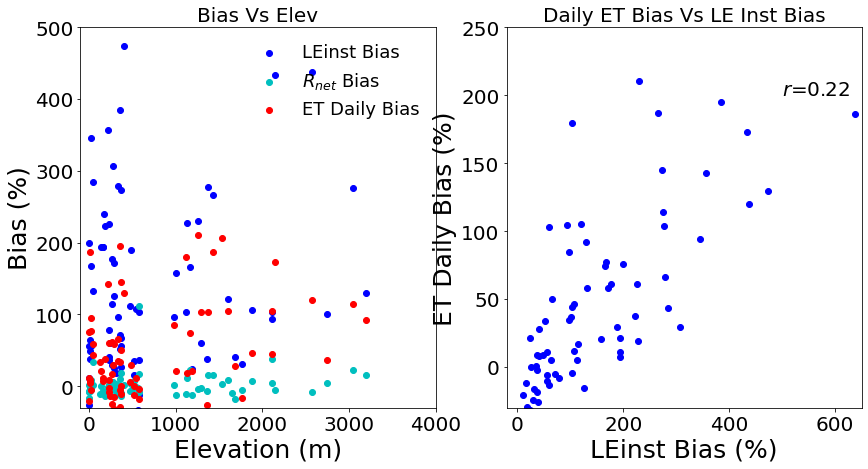

In [11]:
## Plot the bar chart of error 
## Plot the aerpdynamic terms vs Air temp and temp 
## Plot for dry and wet stations
from sklearn.metrics import r2_score
fig,((ax1,ax2))=plt.subplots(1,2,figsize=(14,7))
ax1.scatter(summary_df["elev"],summary_df['le_bias'],c="b",label="LEinst Bias",alpha=1)

# ax1.scatter(summary_df["elev"],summary_df['h_bias'],c="y",label="OpenET PT-JPL",alpha=1)
ax1.scatter(summary_df["elev"],summary_df['rn_bias'],c="c",label="$R_{net}$ Bias",alpha=1)
ax1.scatter(summary_df["elev"],summary_df['LE_daily_bias'],c="r",label="ET Daily Bias",alpha=1)

# ax1.scatter(summary_df["ETo_Ensemble"],summary_df['ETo_Adv'],c="tab:orange",label="ETo MakAdv",alpha=1)

# ax1.plot(np.linspace(10,300,10),np.linspace(10,300,10),c="k",linewidth=2)
# ax1.annotate("$R^2_{PM}$="+str(round(r2_score(summary_df[summary_df["ETo_Ensemble"].notna()]['ETo'],summary_df[summary_df["ETo_Ensemble"].notna()]['PM_ETo_Calc']),3)),xy=(200,60),fontsize=20)
# ax1.annotate("$R^2_{PT}$="+str(round(r2_score(summary_df[summary_df["ETo_Ensemble"].notna()]['ETo'],summary_df[summary_df["ETo_Ensemble"].notna()]['PT_ETo']),3)),xy=(200,80),fontsize=20)
# ax1.annotate("$R^2_{SdB}$="+str(round(r2_score(summary_df[summary_df["ETo_Ensemble"].notna()]['ETo'],summary_df[summary_df["ETo_Ensemble"].notna()]['ETo_SdB']),3)),xy=(200,100),fontsize=20)
# ax1.annotate("$R^2_{Mak}$="+str(round(r2_score(summary_df[summary_df["ETo_Ensemble"].notna()]['ETo'],summary_df[summary_df["ETo_Ensemble"].notna()]['ETo_Mak']),3)),xy=(200,110),fontsize=20)
# ax1.annotate("$R^2_{MakAdv}$="+str(round(r2_score(summary_df[summary_df["ETo_Ensemble"].notna()]['ETo'],summary_df[summary_df["ETo_Ensemble"].notna()]['ETo_Adv']),3)),xy=(200,120),fontsize=20)

# ax1.set_xlim(10,300)
# ax1.set_ylim(10,300)

# ax1.annotate("$r_{PT}$="+str(round(summary_df['Air temp'].corr(summary_df['Aero_PT']),3)),xy=(0,55),fontsize=20)
# ax1.annotate("$r_{CIMISPT}$="+str(round(summary_df['Air temp'].corr(summary_df['Aero_actual']),3)),xy=(0,50),fontsize=20)

# ax1.scatter(summary_df["Air temp"],summary_df['Aero_PT'],c="g",label="Priestley-Taylor",s=5,alpha=0.5)
# ax1.scatter(summary_df["Air temp"],summary_df[ 'ETo_SdB'],c="y",label="Slob de Bruin")
# ax1.scatter(summary_df["Air temp"],summary_df[ 'Aero_actual'],c="r",label="Estimated",s=5,alpha=0.5)
# ax1.plot(np.linspace(0,7),np.linspace(0,7),c="k")
ax2.scatter(summary_df["le_bias"],summary_df['LE_daily_bias'],c="b",label="OpenET GEESEBAL",alpha=1)
# ax2.scatter(summary_df["MAP"],summary_df['le_bias'],c="g",label="OpenET Ensemble",alpha=1)
# ax2.scatter(summary_df["MAP"],summary_df['h_bias'],c="y",label="OpenET PT-JPL",alpha=1)
# ax2.scatter(summary_df["MAP"],summary_df['rn_bias'],c="m",label="ETo Mak",alpha=1)

# ax2.scatter(alfa["ETo_Ensemble"],summary_df['ETo_SdB'],c="y",label="ETo SdB",alpha=1)
# ax2.plot(np.linspace(40,300,10),np.linspace(40,300,10),c="k",linewidth=2)
ax2.annotate("$r$="+str(round(summary_df["le_bias"].corr(summary_df['LE_daily_bias']),3)),xy=(500,200),fontsize=20)
# ax2.annotate("$R^2_{SdB}$="+str(round(r2_score(alfa["ETo_Ensemble"],summary_df['Rnet_SdB']),3)),xy=(160,75),fontsize=20)
# ax2.annotate("$R^2 {SdB}$="+str(round(r2_score(alfa["ETo_Ensemble"],summary_df['ETo_SdB']),3)),xy=(200,90),fontsize=20)
# ax2.set_xlim(40,260)
# ax2.set_ylim(40,260)
ax1.legend(frameon=False, loc='upper right',fontsize=18)

# ax2.plot(np.linspace(0,10),np.linspace(0,10),c="k")
#------Set limits
ax1.set_xlim(-100,4000)
ax1.set_ylim(-30,500)
ax2.set_xlim(-20,650)
ax2.set_ylim(-30,250)
#-- Set Labels 
ax1.set_title("Bias Vs Elev",fontsize=20)
ax2.set_title("Daily ET Bias Vs LE Inst Bias",fontsize=20)

ax1.set_xlabel("Elevation (m)",fontsize=25)
ax2.set_xlabel("LEinst Bias (%)",fontsize=25)
ax2.set_ylabel("ET Daily Bias (%)",fontsize=25)
ax1.set_ylabel("Bias (%)",fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
# ax1.legend(frameon=False, bbox_to_anchor=(1.7, -0.4, 0.36, 0.25), ncol=4,fontsize=15)
# plt.savefig('C:\\Rouhin_Lenovo\\US_project\\US_Project\\CIMIS\\Figures\\cimis_Wet&dry.png', bbox_inches='tight',dpi=300)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


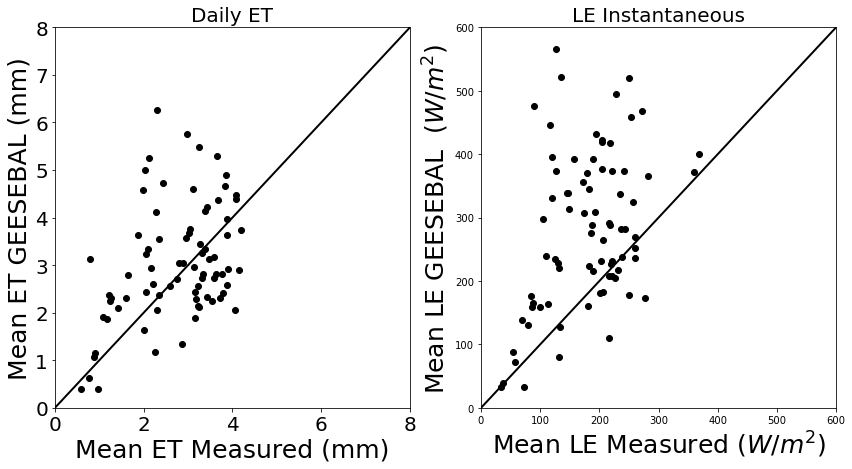

In [12]:
## Plot the bar chart of error 
## Plot the aerpdynamic terms vs Air temp and temp 
## Plot for dry and wet stations
from sklearn.metrics import r2_score
fig,((ax1,ax2))=plt.subplots(1,2,figsize=(14,7))
ax1.scatter(summary_df["LE_daily_mean"],summary_df['LE_daily_sebal_mean'],c="k",alpha=1)
# ax1.scatter(summary_df["elev"],summary_df['le_bias'],c="g",label="OpenET Ensemble",alpha=1)
# ax1.scatter(summary_df["elev"],summary_df['h_bias'],c="y",label="OpenET PT-JPL",alpha=1)
# ax1.scatter(summary_df["elev"],summary_df['rn_bias'],c="m",label="ETo Mak",alpha=1)
# ax1.scatter(summary_df["ETo_Ensemble"],summary_df['ETo_Adv'],c="tab:orange",label="ETo MakAdv",alpha=1)

ax1.plot(np.linspace(0,8,10),np.linspace(0,8,10),c="k",linewidth=2)
# ax1.annotate("$R^2_{PM}$="+str(round(r2_score(summary_df[summary_df["ETo_Ensemble"].notna()]['ETo'],summary_df[summary_df["ETo_Ensemble"].notna()]['PM_ETo_Calc']),3)),xy=(200,60),fontsize=20)
# ax1.annotate("$R^2_{PT}$="+str(round(r2_score(summary_df[summary_df["ETo_Ensemble"].notna()]['ETo'],summary_df[summary_df["ETo_Ensemble"].notna()]['PT_ETo']),3)),xy=(200,80),fontsize=20)
# ax1.annotate("$R^2_{SdB}$="+str(round(r2_score(summary_df[summary_df["ETo_Ensemble"].notna()]['ETo'],summary_df[summary_df["ETo_Ensemble"].notna()]['ETo_SdB']),3)),xy=(200,100),fontsize=20)
# ax1.annotate("$R^2_{Mak}$="+str(round(r2_score(summary_df[summary_df["ETo_Ensemble"].notna()]['ETo'],summary_df[summary_df["ETo_Ensemble"].notna()]['ETo_Mak']),3)),xy=(200,110),fontsize=20)
# ax1.annotate("$R^2_{MakAdv}$="+str(round(r2_score(summary_df[summary_df["ETo_Ensemble"].notna()]['ETo'],summary_df[summary_df["ETo_Ensemble"].notna()]['ETo_Adv']),3)),xy=(200,120),fontsize=20)

# ax1.set_xlim(10,300)
# ax1.set_ylim(10,300)

# ax1.annotate("$r_{PT}$="+str(round(summary_df['Air temp'].corr(summary_df['Aero_PT']),3)),xy=(0,55),fontsize=20)
# ax1.annotate("$r_{CIMISPT}$="+str(round(summary_df['Air temp'].corr(summary_df['Aero_actual']),3)),xy=(0,50),fontsize=20)

# ax1.scatter(summary_df["Air temp"],summary_df['Aero_PT'],c="g",label="Priestley-Taylor",s=5,alpha=0.5)
# ax1.scatter(summary_df["Air temp"],summary_df[ 'ETo_SdB'],c="y",label="Slob de Bruin")
# ax1.scatter(summary_df["Air temp"],summary_df[ 'Aero_actual'],c="r",label="Estimated",s=5,alpha=0.5)
# ax1.plot(np.linspace(0,7),np.linspace(0,7),c="k")
ax2.scatter(summary_df["LE_mean"],summary_df['LE_inst_sebal_mean'],c="k",alpha=1)
# ax2.scatter(summary_df["MAP"],summary_df['le_bias'],c="g",label="OpenET Ensemble",alpha=1)
# ax2.scatter(summary_df["MAP"],summary_df['h_bias'],c="y",label="OpenET PT-JPL",alpha=1)
# ax2.scatter(summary_df["MAP"],summary_df['rn_bias'],c="m",label="ETo Mak",alpha=1)

# ax2.scatter(alfa["ETo_Ensemble"],summary_df['ETo_SdB'],c="y",label="ETo SdB",alpha=1)
ax2.plot(np.linspace(0,600,10),np.linspace(0,600,10),c="k",linewidth=2)
# ax2.annotate("$R^2$="+str(round(b,3)),xy=(400,5500),fontsize=20)
# ax2.annotate("$R^2_{SdB}$="+str(round(r2_score(alfa["ETo_Ensemble"],summary_df['Rnet_SdB']),3)),xy=(160,75),fontsize=20)
# ax2.annotate("$R^2 {SdB}$="+str(round(r2_score(alfa["ETo_Ensemble"],summary_df['ETo_SdB']),3)),xy=(200,90),fontsize=20)
# ax2.set_xlim(40,260)
# ax2.set_ylim(40,260)
ax1.legend(frameon=False, loc='upper right',fontsize=18)

# ax2.plot(np.linspace(0,10),np.linspace(0,10),c="k")
#------Set limits
ax1.set_xlim(0,8)
ax1.set_ylim(0,8)
ax2.set_xlim(0,600)
ax2.set_ylim(0,600)
#-- Set Labels 
ax1.set_title("Daily ET",fontsize=20)
ax2.set_title("LE Instantaneous",fontsize=20)

ax1.set_xlabel("Mean ET Measured (mm)",fontsize=25)
ax2.set_xlabel("Mean LE Measured ($W/m^2$)",fontsize=25)
ax1.set_ylabel("Mean ET GEESEBAL (mm)",fontsize=25)
ax2.set_ylabel("Mean LE GEESEBAL  ($W/m^2$)",fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=20)
# ax2.tick_params(axis='both', which='major', labelsize=20)
# ax1.legend(frameon=False, bbox_to_anchor=(1.7, -0.4, 0.36, 0.25), ncol=4,fontsize=15)
# plt.savefig('C:\\Rouhin_Lenovo\\US_project\\US_Project\\CIMIS\\Figures\\cimis_Wet&dry.png', bbox_inches='tight',dpi=300)


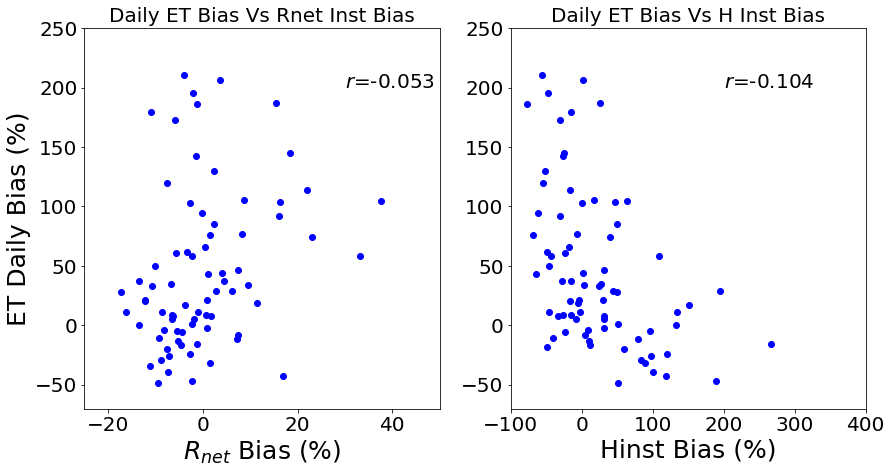

In [13]:
## Plot the bar chart of error 
## Plot the aerpdynamic terms vs Air temp and temp 
## Plot for dry and wet stations
from sklearn.metrics import r2_score
fig,((ax1,ax2))=plt.subplots(1,2,figsize=(14,7))
ax1.scatter(summary_df["rn_bias"],summary_df['LE_daily_bias'],c="b",label="LEinst Bias",alpha=1)



# ax1.scatter(summary_df["ETo_Ensemble"],summary_df['ETo_Adv'],c="tab:orange",label="ETo MakAdv",alpha=1)

# ax1.plot(np.linspace(10,300,10),np.linspace(10,300,10),c="k",linewidth=2)
ax1.annotate("$r$="+str(round(summary_df["rn_bias"].corr(summary_df['LE_daily_bias']),3)),xy=(30,200),fontsize=20)
# ax1.annotate("$R^2_{PT}$="+str(round(r2_score(summary_df[summary_df["ETo_Ensemble"].notna()]['ETo'],summary_df[summary_df["ETo_Ensemble"].notna()]['PT_ETo']),3)),xy=(200,80),fontsize=20)
# ax1.annotate("$R^2_{SdB}$="+str(round(r2_score(summary_df[summary_df["ETo_Ensemble"].notna()]['ETo'],summary_df[summary_df["ETo_Ensemble"].notna()]['ETo_SdB']),3)),xy=(200,100),fontsize=20)
# ax1.annotate("$R^2_{Mak}$="+str(round(r2_score(summary_df[summary_df["ETo_Ensemble"].notna()]['ETo'],summary_df[summary_df["ETo_Ensemble"].notna()]['ETo_Mak']),3)),xy=(200,110),fontsize=20)
# ax1.annotate("$R^2_{MakAdv}$="+str(round(r2_score(summary_df[summary_df["ETo_Ensemble"].notna()]['ETo'],summary_df[summary_df["ETo_Ensemble"].notna()]['ETo_Adv']),3)),xy=(200,120),fontsize=20)

# ax1.set_xlim(10,300)
# ax1.set_ylim(10,300)

# ax1.annotate("$r_{PT}$="+str(round(summary_df['Air temp'].corr(summary_df['Aero_PT']),3)),xy=(0,55),fontsize=20)
# ax1.annotate("$r_{CIMISPT}$="+str(round(summary_df['Air temp'].corr(summary_df['Aero_actual']),3)),xy=(0,50),fontsize=20)

# ax1.scatter(summary_df["Air temp"],summary_df['Aero_PT'],c="g",label="Priestley-Taylor",s=5,alpha=0.5)
# ax1.scatter(summary_df["Air temp"],summary_df[ 'ETo_SdB'],c="y",label="Slob de Bruin")
# ax1.scatter(summary_df["Air temp"],summary_df[ 'Aero_actual'],c="r",label="Estimated",s=5,alpha=0.5)
# ax1.plot(np.linspace(0,7),np.linspace(0,7),c="k")
ax2.scatter(summary_df["h_bias"],summary_df['LE_daily_bias'],c="b",label="OpenET GEESEBAL",alpha=1)
# ax2.scatter(summary_df["MAP"],summary_df['le_bias'],c="g",label="OpenET Ensemble",alpha=1)
# ax2.scatter(summary_df["MAP"],summary_df['h_bias'],c="y",label="OpenET PT-JPL",alpha=1)
# ax2.scatter(summary_df["MAP"],summary_df['rn_bias'],c="m",label="ETo Mak",alpha=1)

# ax2.scatter(alfa["ETo_Ensemble"],summary_df['ETo_SdB'],c="y",label="ETo SdB",alpha=1)
# ax2.plot(np.linspace(40,300,10),np.linspace(40,300,10),c="k",linewidth=2)
ax2.annotate("$r$="+str(round(summary_df["h_bias"].corr(summary_df['LE_daily_bias']),3)),xy=(200,200),fontsize=20)
# ax2.annotate("$R^2_{SdB}$="+str(round(r2_score(alfa["ETo_Ensemble"],summary_df['Rnet_SdB']),3)),xy=(160,75),fontsize=20)
# ax2.annotate("$R^2 {SdB}$="+str(round(r2_score(alfa["ETo_Ensemble"],summary_df['ETo_SdB']),3)),xy=(200,90),fontsize=20)
# ax2.set_xlim(40,260)
# ax2.set_ylim(40,260)
# ax1.legend(frameon=False, loc='upper right',fontsize=18)

# ax2.plot(np.linspace(0,10),np.linspace(0,10),c="k")
#------Set limits
ax1.set_xlim(-25,50)
ax1.set_ylim(-70,250)
ax2.set_xlim(-100,400)
ax2.set_ylim(-70,250)
#-- Set Labels 
ax1.set_title("Daily ET Bias Vs Rnet Inst Bias",fontsize=20)
ax2.set_title("Daily ET Bias Vs H Inst Bias",fontsize=20)

ax1.set_xlabel("$R_{net}$ Bias (%)",fontsize=25)
ax2.set_xlabel("Hinst Bias (%)",fontsize=25)
# ax2.set_ylabel("ET Daily Bias (%)",fontsize=25)
ax1.set_ylabel("ET Daily Bias (%)",fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
# ax1.legend(frameon=False, bbox_to_anchor=(1.7, -0.4, 0.36, 0.25), ncol=4,fontsize=15)
# plt.savefig('C:\\Rouhin_Lenovo\\US_project\\US_Project\\CIMIS\\Figures\\cimis_Wet&dry.png', bbox_inches='tight',dpi=300)


### Landcover distribution 
Plot barchart for each station in increasing order of bias but grouped by Vegetation in same color

In [182]:

summary_df.sort_values(by=["veg","LE_daily_rmse"],inplace=True)
# order of landcover is 
# Cropland ,closed shrubland, mixed, deciduous broadleaf, evergreend,grasslands,mixed forest, openshrublands,savannas,wetlands,woodysavannas 


In [194]:
summary_df.veg.unique()
# summary_df[summary_df.veg.isna()]

array(['CRO', 'CSH', 'CVM', 'DBF', 'ENF', 'GRA', 'MF', 'OSH', 'SAV',
       'WET', 'WSA', nan], dtype=object)

In [184]:
###
(data[0]["LE_closed"]/28.36).describe()
summary_df["LE_daily_rmse"].std()

0.6353608777497565

In [185]:
lc=[]
for i in summary_df["veg"].unique():
    lc.append(summary_df[summary_df["veg"]==i])
lc[0]

,rn_bias,h_bias,le_bias,rn_rmse,h_rmse,le_rmse,lat,lon,elev,veg,...,LE_daily_sebal_mean,LE_mean,LE_daily_mean,LE_inst_sebal_mean,rn_mean,LE_daily_std,LE_daily_sebal_std,CV_LE_daily,CV_LE_sebal_daily,le_daily_r_squared
41,7.480738,5.322768,78.604858,73.588789,88.228894,159.071080,40.064547,-88.196011,224.0,CRO,...,2.698128,186.667404,2.751331,287.841316,512.518750,1.572864,1.933410,0.571674,0.716575,0.624706
42,1.810507,31.544650,40.944672,72.308398,92.545437,139.943820,40.062930,-88.198436,224.0,CRO,...,3.328831,257.104615,3.379124,324.791917,533.518750,1.504557,1.780530,0.445251,0.534881,0.243338
70,-7.197354,98.430841,38.563562,76.459488,123.417528,158.652141,40.461782,-103.029262,1364.0,CRO,...,2.442569,181.358635,3.153631,160.107276,572.727143,2.330792,1.883280,0.739082,0.771024,0.586183
2,-16.293907,134.589801,56.121891,114.531330,109.603435,111.264429,38.109095,-121.535186,-5.0,CRO,...,2.807287,201.975730,3.337516,231.384479,610.126619,2.235507,1.800812,0.669812,0.641478,0.528107
30,-2.236334,109.203063,171.406888,31.499418,103.489107,141.749792,44.714407,-93.089763,290.0,CRO,...,2.554958,205.801390,2.586880,264.689191,487.026817,2.245948,1.533051,0.868207,0.600030,0.441237
1,-7.506779,59.862249,11.435711,75.500588,109.262606,109.975920,38.099123,-121.499343,-2.7,CRO,...,2.925764,259.887467,3.894378,252.287643,536.208316,2.126460,1.737220,0.546033,0.593766,0.387167
40,-7.285997,100.215704,-26.338329,88.381833,127.263895,123.169179,38.115293,-121.647026,-4.0,CRO,...,2.298104,249.830323,3.721192,178.174773,539.965879,1.940514,1.556350,0.521476,0.677232,0.024391
24,-5.538696,95.920174,71.455686,73.803863,116.662264,134.243742,41.164894,-96.470033,362.0,CRO,...,2.141012,215.768539,3.231563,207.811014,550.162921,2.525545,1.705415,0.781524,0.796546,0.426726
32,-1.238950,267.403241,125.282669,75.115996,184.099434,139.307263,44.690961,-93.057693,283.0,CRO,...,2.246519,189.824406,3.533361,216.080510,546.657257,1.922469,1.539276,0.544091,0.685183,-0.043421
16,-2.677982,119.756130,29.985385,82.626372,156.979299,131.614002,39.229923,-92.116618,260.0,CRO,...,2.333937,219.289976,3.426839,226.480022,563.513644,2.025349,1.585338,0.591025,0.679255,0.034087


In [188]:
print(lc[i])

Empty DataFrame
Columns: [rn_bias, h_bias, le_bias, rn_rmse, h_rmse, le_rmse, lat, lon, elev, veg, clim, MAP, MAT, LE_shape, H_shape, G_shape, netrad_shape, LE_daily_bias, LE_daily_rmse, Rn_daily_bias, Rn_daily_rmse, LE_daily_sebal_mean, LE_mean, LE_daily_mean, LE_inst_sebal_mean, rn_mean, LE_daily_std, LE_daily_sebal_std, CV_LE_daily, CV_LE_sebal_daily, le_daily_r_squared]
Index: []

[0 rows x 31 columns]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[15 16 17]
[18]
[19 20 21 22 23 24 25 26 27 28 29 30 31]
[32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
[48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]
[63 64 65]
[66 67 68 69 70 71]
[72 73 74]
[75]
[76 77]
[]


IndexError: list index out of range

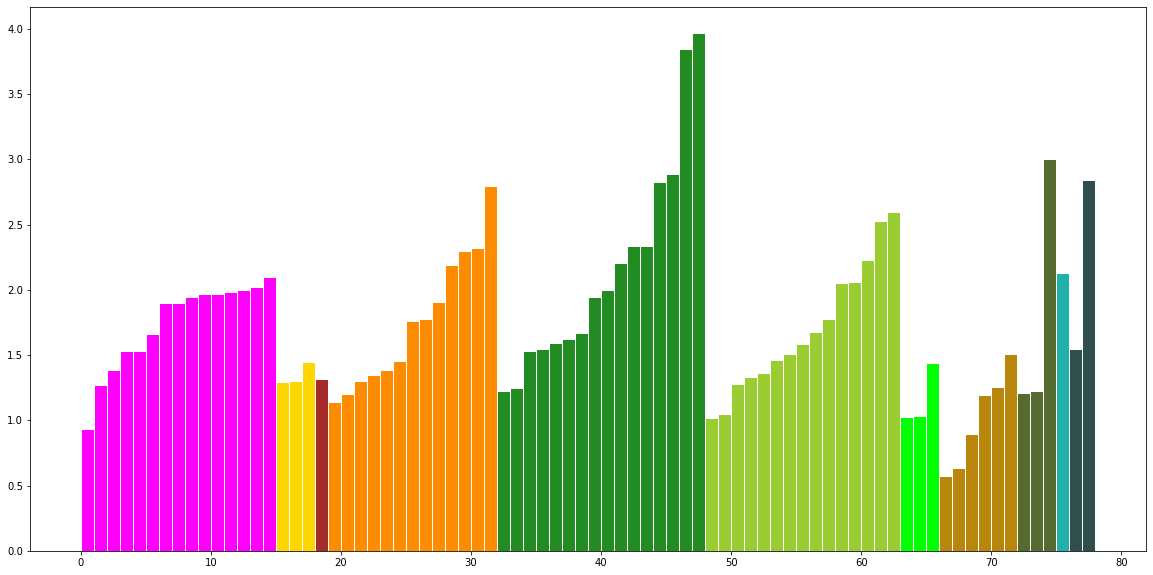

In [189]:
fig, ax = plt.subplots(figsize=(20,10))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
pos=[]
add=0
for i in range(len(lc)):
    # print(len(lc[i]))
    print(np.arange(add,add+len(lc[i])))

    pos.append(np.arange(add,add+len(lc[i])))
    add=add+len(lc[i])
colors=["magenta","gold","brown","darkorange","forestgreen","yellowgreen","lime","darkgoldenrod","darkolivegreen","lightseagreen","darkslategray"]
labels=["Cropland" ,"closed shrubland", "mixed", "deciduous broadleaf", "evergreen forest","grasslands","mixed forest", "openshrublands","savannas","wetlands","woodysavannas"]

# pos[0]
# # Make the plot
for i in range(len(pos)):
    plt.bar(pos[i], lc[i]["LE_daily_rmse"], color=colors[i], width=1, edgecolor='white',align="edge",label=labels[i])
# # plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
# # plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# # Add xticks on the middle of the group bars
plt.xlabel('Sites',fontsize=25)
plt.ylabel('Daily ET Rmse (mm/day)',fontsize=26)

# plt.xticks([], ['CRO', 'B', 'C', 'D', 'E'])
plt.xticks([])
plt.yticks(fontsize=20)

# # Create legend & Show graphic
plt.legend(fontsize=16,frameon=False)
plt.show()

In [243]:
summary_df.to_csv("C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Summary_af.csv")

### Make Maps of data

In [14]:
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
import matplotlib as mpl
import geopandas as gpd

In [15]:
os.chdir("C:\\Rouhin_Lenovo\\US_project\\US_Project\\Shapefiles")
us=gpd.read_file("s_11au16.shp")
us=us[us["STATE"]!="AK"]

In [49]:
summary_df["LE_shape"].describe()
# np.linspace(1,20,6)

count     78.000000
mean      41.448718
std       50.637917
min        1.000000
25%        8.000000
50%       21.000000
75%       62.750000
max      300.000000
Name: LE_shape, dtype: float64

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.])

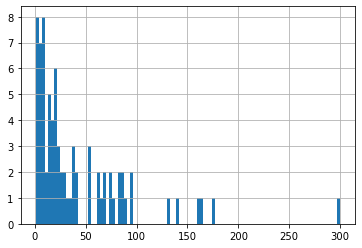

In [64]:
summary_df["LE_shape"].hist(bins=100)
np.linspace(0,40,9)

Text(-125, 28.5, '# comparable observations')

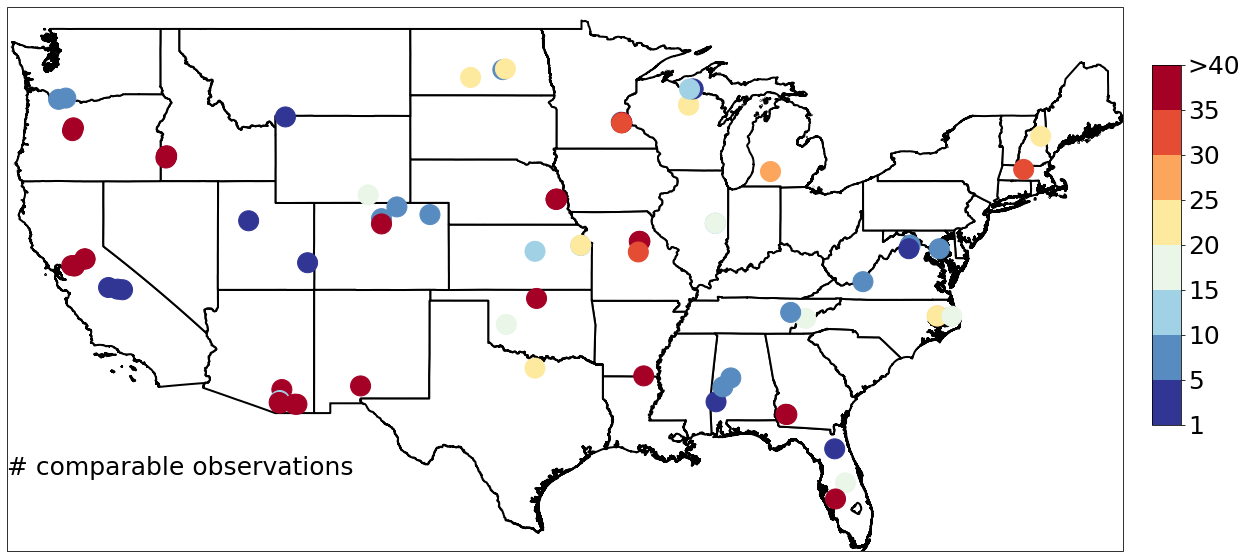

In [207]:
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,10))
gs1 = gridspec.GridSpec(1, 1)
axs.set_aspect("auto")
# axs[1].set_aspect("auto")
# axs[1,0].set_aspect("auto")
# axs[1,1].set_aspect("auto")
fig.subplots_adjust(wspace=0,hspace=0)
axs.add_geometries(us.geometry, ccrs.PlateCarree(), facecolor='white', edgecolor='black',linewidth=2)
axs.set_extent([-125, -67,25, 50], crs=ccrs.PlateCarree())
#--------------------------------
# define the bins and normalize
a=plt.cm.RdYlBu
cmap=a.reversed()
bounds = np.linspace(0,40,9)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# #---------------
p=axs.scatter(x=summary_df.lon, y=summary_df.lat,
            c=summary_df["LE_shape"],
            s=400,
            alpha=1,transform=ccrs.PlateCarree(),zorder=2,cmap=cmap, norm=norm) ## Important
# p=axs[1].scatter(x=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Longitude, y=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Latitude,
#             c=cimis_80[cimis_80.p_Aero_PM_u<=0.05]['r_Aero_PM_u'],
#             s=200,
#             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # axs[1,0].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['Aero_PT'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # p=axs[1,1].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['ETo_SdB'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
ax2 = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cb = fig.colorbar(p,cax=ax2, cmap=cmap, norm=norm,
    ticks=bounds, boundaries=bounds)
ticklabels = ["1","5","10","15","20","25","30","35",">40"]
cb.set_ticklabels(ticklabels,fontsize=25)
# #annotations 
axs.annotate("# comparable observations",xy=(-125,28.5),fontsize=25,annotation_clip=False)
# #annotations 
# axs[0].annotate("(a) CIMIS PM",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# axs[1].annotate("(b) FAO-PM ",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# # axs[1,0].annotate("(c) ETo PT",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # axs[1,1].annotate("(d) ETo SdB",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # mpl.rcParams['axes.linewidth'] = 1
# # axs[0].annotate("Penman Monteith")
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 2
# [s.set_frame_on(False) for s in axs.flatten()]
# # plt.savefig('C:\\Rouhin_Lenovo\\US_project\\US_Project\\cimis_80\\Figures\\cimis_80_eto.png', bbox_inches='tight',dpi=300)

In [79]:
summary_df["LE_daily_sebal_mean"].describe()
np.linspace(0.5,5,10)

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

Text(-124, 28.5, 'Mean ET (mm/day)')

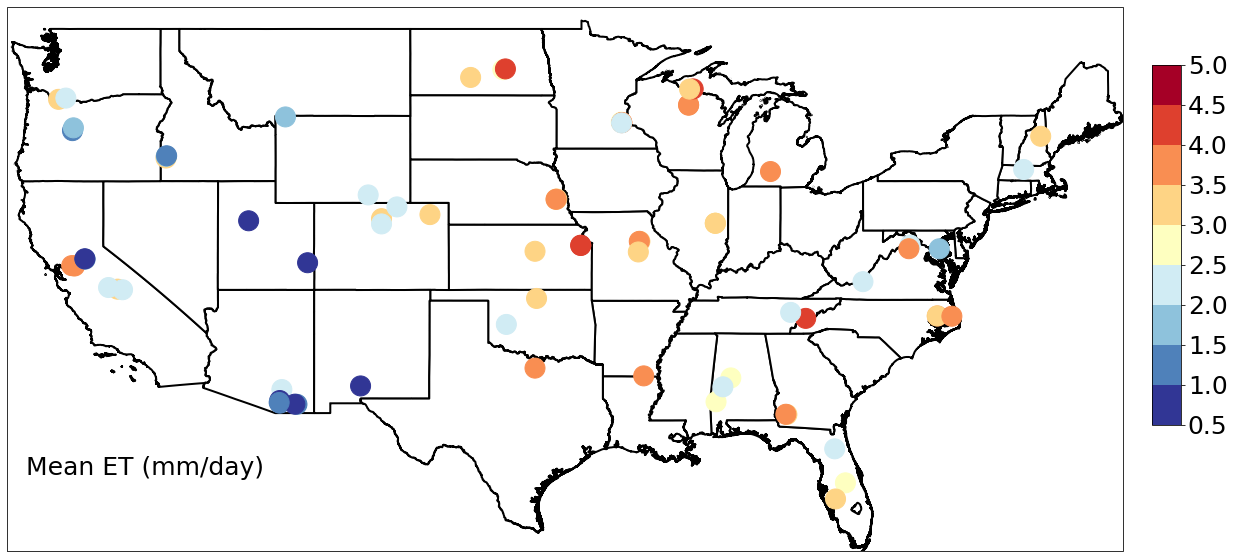

In [206]:
## Mean LE dailya
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,10))
gs1 = gridspec.GridSpec(1, 1)
axs.set_aspect("auto")
# axs[1].set_aspect("auto")
# axs[1,0].set_aspect("auto")
# axs[1,1].set_aspect("auto")
fig.subplots_adjust(wspace=0,hspace=0)
axs.add_geometries(us.geometry, ccrs.PlateCarree(), facecolor='white', edgecolor='black',linewidth=2)
axs.set_extent([-125, -67,25, 50], crs=ccrs.PlateCarree())
#--------------------------------
# define the bins and normalize
a=plt.cm.RdYlBu
cmap=a.reversed()
bounds = np.linspace(0.5,5,10)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# #---------------
p=axs.scatter(x=summary_df.lon, y=summary_df.lat,
            c=summary_df["LE_daily_mean"],
            s=400,
            alpha=1,transform=ccrs.PlateCarree(),zorder=2,cmap=cmap, norm=norm) ## Important
# p=axs[1].scatter(x=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Longitude, y=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Latitude,
#             c=cimis_80[cimis_80.p_Aero_PM_u<=0.05]['r_Aero_PM_u'],
#             s=200,
#             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # axs[1,0].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['Aero_PT'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # p=axs[1,1].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['ETo_SdB'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
ax2 = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cb = fig.colorbar(p,cax=ax2, cmap=cmap, norm=norm,
    ticks=bounds, boundaries=bounds)
ticklabels = np.linspace(0.5,5,10)
cb.set_ticklabels(ticklabels,fontsize=25)
# #annotations 
axs.annotate("Mean ET (mm/day)",xy=(-124,28.5),fontsize=25,annotation_clip=False)
# #annotations 
# axs[0].annotate("(a) CIMIS PM",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# axs[1].annotate("(b) FAO-PM ",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# # axs[1,0].annotate("(c) ETo PT",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # axs[1,1].annotate("(d) ETo SdB",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # mpl.rcParams['axes.linewidth'] = 1
# # axs[0].annotate("Penman Monteith")
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 2
# [s.set_frame_on(False) for s in axs.flatten()]
# # plt.savefig('C:\\Rouhin_Lenovo\\US_project\\US_Project\\cimis_80\\Figures\\cimis_80_eto.png', bbox_inches='tight',dpi=300)

Text(-124, 28.5, 'Mean GEESEBAL ET (mm/day)')

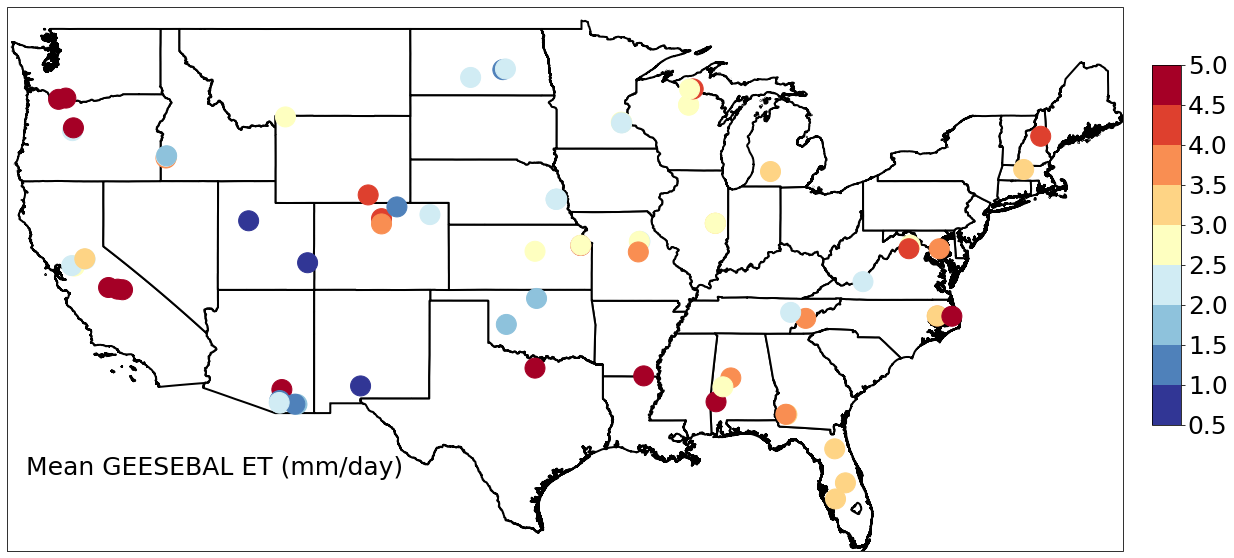

In [205]:
## Mean LE dailya
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,10))
gs1 = gridspec.GridSpec(1, 1)
axs.set_aspect("auto")
# axs[1].set_aspect("auto")
# axs[1,0].set_aspect("auto")
# axs[1,1].set_aspect("auto")
fig.subplots_adjust(wspace=0,hspace=0)
axs.add_geometries(us.geometry, ccrs.PlateCarree(), facecolor='white', edgecolor='black',linewidth=2)
axs.set_extent([-125, -67,25, 50], crs=ccrs.PlateCarree())
#--------------------------------
# define the bins and normalize
a=plt.cm.RdYlBu
cmap=a.reversed()
bounds = np.linspace(0.5,5,10)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# #---------------
p=axs.scatter(x=summary_df.lon, y=summary_df.lat,
            c=summary_df["LE_daily_sebal_mean"],
            s=400,
            alpha=1,transform=ccrs.PlateCarree(),zorder=2,cmap=cmap, norm=norm) ## Important
# p=axs[1].scatter(x=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Longitude, y=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Latitude,
#             c=cimis_80[cimis_80.p_Aero_PM_u<=0.05]['r_Aero_PM_u'],
#             s=200,
#             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # axs[1,0].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['Aero_PT'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # p=axs[1,1].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['ETo_SdB'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
ax2 = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cb = fig.colorbar(p,cax=ax2, cmap=cmap, norm=norm,
    ticks=bounds, boundaries=bounds)
ticklabels = np.linspace(0.5,5,10)
cb.set_ticklabels(ticklabels,fontsize=25)
# #annotations 
axs.annotate("Mean GEESEBAL ET (mm/day)",xy=(-124,28.5),fontsize=25,annotation_clip=False)
# #annotations 
# axs[0].annotate("(a) CIMIS PM",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# axs[1].annotate("(b) FAO-PM ",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# # axs[1,0].annotate("(c) ETo PT",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # axs[1,1].annotate("(d) ETo SdB",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # mpl.rcParams['axes.linewidth'] = 1
# # axs[0].annotate("Penman Monteith")
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 2
# [s.set_frame_on(False) for s in axs.flatten()]
# # plt.savefig('C:\\Rouhin_Lenovo\\US_project\\US_Project\\cimis_80\\Figures\\cimis_80_eto.png', bbox_inches='tight',dpi=300)

In [87]:
summary_df["LE_daily_std"].describe()
np.linspace(0.5,3,6)

array([0.5, 1. , 1.5, 2. , 2.5, 3. ])

Text(-124, 28.5, '$\\sigma_{ET_{obs}}$ (mm/day)')

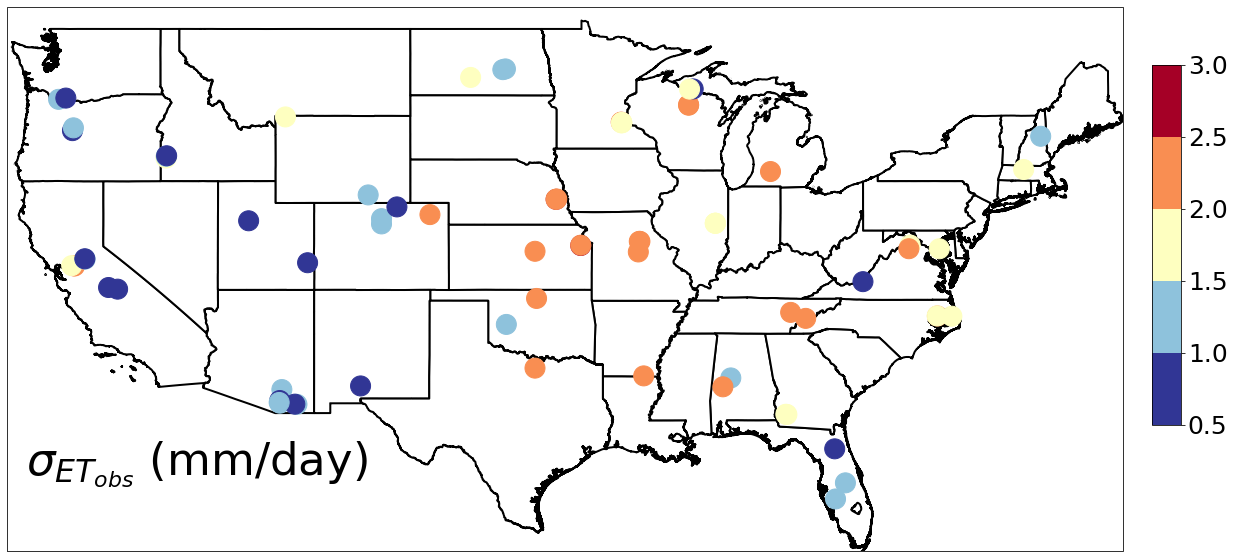

In [204]:
## Mean LE dailya
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,10))
gs1 = gridspec.GridSpec(1, 1)
axs.set_aspect("auto")
# axs[1].set_aspect("auto")
# axs[1,0].set_aspect("auto")
# axs[1,1].set_aspect("auto")
fig.subplots_adjust(wspace=0,hspace=0)
axs.add_geometries(us.geometry, ccrs.PlateCarree(), facecolor='white', edgecolor='black',linewidth=2)
axs.set_extent([-125, -67,25, 50], crs=ccrs.PlateCarree())
#--------------------------------
# define the bins and normalize
a=plt.cm.RdYlBu
cmap=a.reversed()
bounds = np.linspace(0.5,3,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# #---------------
p=axs.scatter(x=summary_df.lon, y=summary_df.lat,
            c=summary_df["LE_daily_std"],
            s=400,
            alpha=1,transform=ccrs.PlateCarree(),zorder=2,cmap=cmap, norm=norm) ## Important
# p=axs[1].scatter(x=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Longitude, y=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Latitude,
#             c=cimis_80[cimis_80.p_Aero_PM_u<=0.05]['r_Aero_PM_u'],
#             s=200,
#             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # axs[1,0].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['Aero_PT'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # p=axs[1,1].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['ETo_SdB'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
ax2 = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cb = fig.colorbar(p,cax=ax2, cmap=cmap, norm=norm,
    ticks=bounds, boundaries=bounds)
ticklabels = np.linspace(0.5,3,6)
cb.set_ticklabels(ticklabels,fontsize=25)
# #annotations 
axs.annotate("$\sigma_{ET_{obs}}$ (mm/day)",xy=(-124,28.5),fontsize=45,annotation_clip=False)
# #annotations 
# axs[0].annotate("(a) CIMIS PM",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# axs[1].annotate("(b) FAO-PM ",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# # axs[1,0].annotate("(c) ETo PT",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # axs[1,1].annotate("(d) ETo SdB",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # mpl.rcParams['axes.linewidth'] = 1
# # axs[0].annotate("Penman Monteith")
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 2
# [s.set_frame_on(False) for s in axs.flatten()]
# # plt.savefig('C:\\Rouhin_Lenovo\\US_project\\US_Project\\cimis_80\\Figures\\cimis_80_eto.png', bbox_inches='tight',dpi=300)

Text(-124, 28.5, '$\\sigma_{ET_{GEESEBAL}}$ (mm/day)')

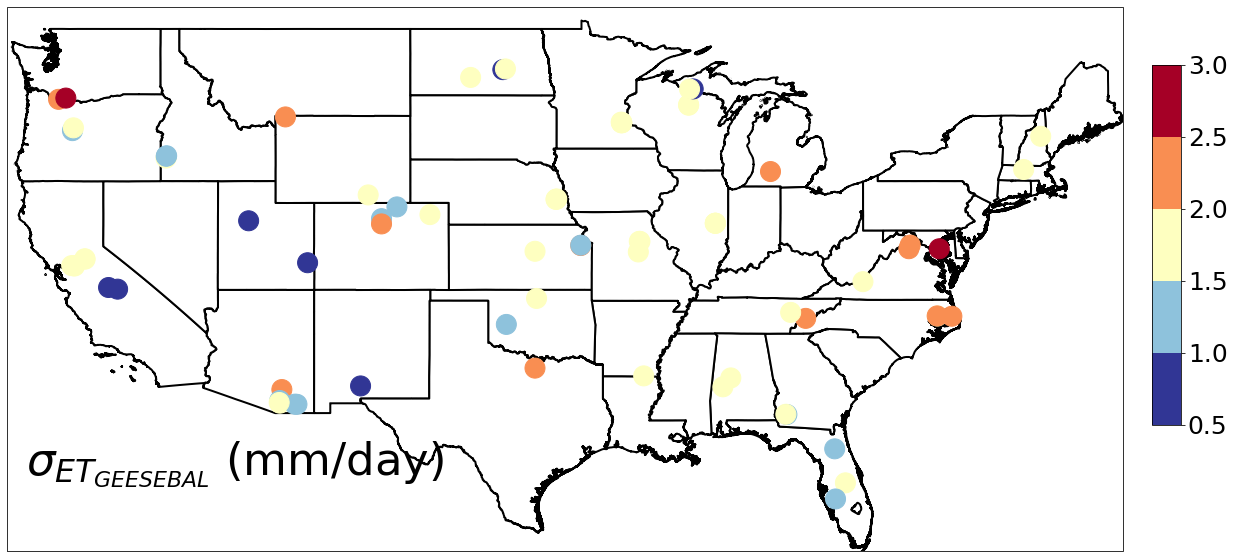

In [203]:
## Mean LE dailya
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,10))
gs1 = gridspec.GridSpec(1, 1)
axs.set_aspect("auto")
# axs[1].set_aspect("auto")
# axs[1,0].set_aspect("auto")
# axs[1,1].set_aspect("auto")
fig.subplots_adjust(wspace=0,hspace=0)
axs.add_geometries(us.geometry, ccrs.PlateCarree(), facecolor='white', edgecolor='black',linewidth=2)
axs.set_extent([-125, -67,25, 50], crs=ccrs.PlateCarree())
#--------------------------------
# define the bins and normalize
a=plt.cm.RdYlBu
cmap=a.reversed()
bounds = np.linspace(0.5,3,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# #---------------
p=axs.scatter(x=summary_df.lon, y=summary_df.lat,
            c=summary_df["LE_daily_sebal_std"],
            s=400,
            alpha=1,transform=ccrs.PlateCarree(),zorder=2,cmap=cmap, norm=norm) ## Important
# p=axs[1].scatter(x=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Longitude, y=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Latitude,
#             c=cimis_80[cimis_80.p_Aero_PM_u<=0.05]['r_Aero_PM_u'],
#             s=200,
#             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # axs[1,0].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['Aero_PT'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # p=axs[1,1].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['ETo_SdB'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
ax2 = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cb = fig.colorbar(p,cax=ax2, cmap=cmap, norm=norm,
    ticks=bounds, boundaries=bounds)
ticklabels = np.linspace(0.5,3,6)
cb.set_ticklabels(ticklabels,fontsize=25)
# #annotations 
axs.annotate("$\sigma_{ET_{GEESEBAL}}$ (mm/day)",xy=(-124,28.5),fontsize=45,annotation_clip=False)
# #annotations 
# axs[0].annotate("(a) CIMIS PM",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# axs[1].annotate("(b) FAO-PM ",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# # axs[1,0].annotate("(c) ETo PT",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # axs[1,1].annotate("(d) ETo SdB",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # mpl.rcParams['axes.linewidth'] = 1
# # axs[0].annotate("Penman Monteith")
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 2
# [s.set_frame_on(False) for s in axs.flatten()]
# # plt.savefig('C:\\Rouhin_Lenovo\\US_project\\US_Project\\cimis_80\\Figures\\cimis_80_eto.png', bbox_inches='tight',dpi=300)

In [99]:
### Coefficient of variation
summary_df["CV_LE_daily"].describe()
np.linspace(0,1.2,7)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2])

Text(-124, 28.5, '$CV_{ET_{obs}}$')

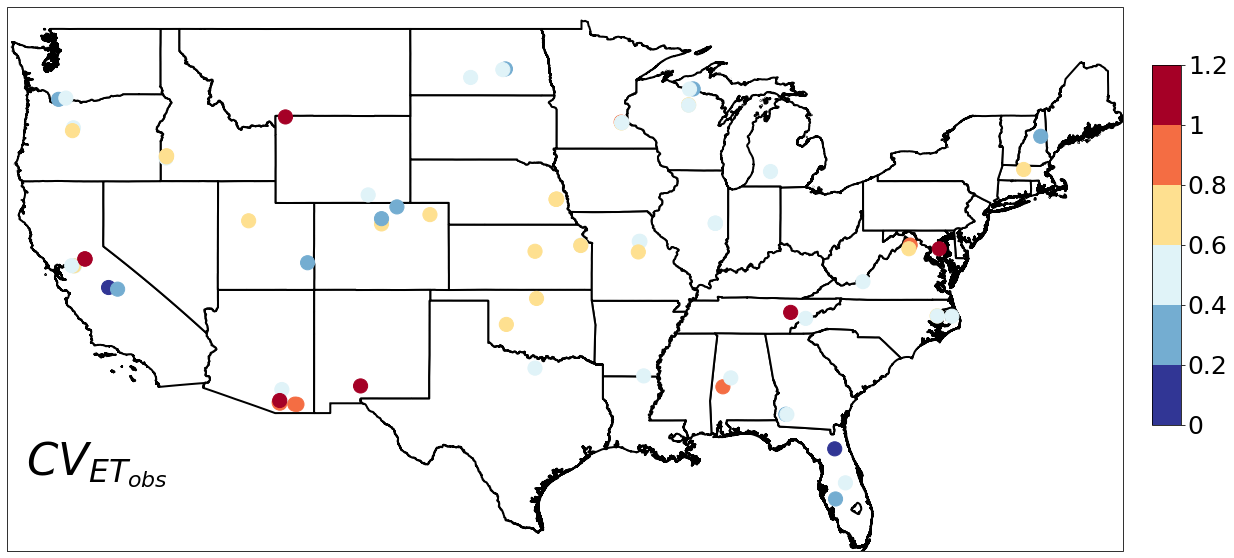

In [103]:
## Mean LE dailya
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,10))
gs1 = gridspec.GridSpec(1, 1)
axs.set_aspect("auto")
# axs[1].set_aspect("auto")
# axs[1,0].set_aspect("auto")
# axs[1,1].set_aspect("auto")
fig.subplots_adjust(wspace=0,hspace=0)
axs.add_geometries(us.geometry, ccrs.PlateCarree(), facecolor='white', edgecolor='black',linewidth=2)
axs.set_extent([-125, -67,25, 50], crs=ccrs.PlateCarree())
#--------------------------------
# define the bins and normalize
a=plt.cm.RdYlBu
cmap=a.reversed()
bounds = np.linspace(0,1.2,7)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# #---------------
p=axs.scatter(x=summary_df.lon, y=summary_df.lat,
            c=summary_df["CV_LE_daily"],
            s=200,
            alpha=1,transform=ccrs.PlateCarree(),zorder=2,cmap=cmap, norm=norm) ## Important
# p=axs[1].scatter(x=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Longitude, y=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Latitude,
#             c=cimis_80[cimis_80.p_Aero_PM_u<=0.05]['r_Aero_PM_u'],
#             s=200,
#             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # axs[1,0].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['Aero_PT'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # p=axs[1,1].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['ETo_SdB'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
ax2 = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cb = fig.colorbar(p,cax=ax2, cmap=cmap, norm=norm,
    ticks=bounds, boundaries=bounds)
ticklabels = [0,0.2,0.4,0.6,0.8,1,1.2]
cb.set_ticklabels(ticklabels,fontsize=25)
# #annotations 
axs.annotate("$CV_{ET_{obs}}$",xy=(-124,28.5),fontsize=45,annotation_clip=False)
# #annotations 
# axs[0].annotate("(a) CIMIS PM",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# axs[1].annotate("(b) FAO-PM ",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# # axs[1,0].annotate("(c) ETo PT",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # axs[1,1].annotate("(d) ETo SdB",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # mpl.rcParams['axes.linewidth'] = 1
# # axs[0].annotate("Penman Monteith")
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 2
# [s.set_frame_on(False) for s in axs.flatten()]
# # plt.savefig('C:\\Rouhin_Lenovo\\US_project\\US_Project\\cimis_80\\Figures\\cimis_80_eto.png', bbox_inches='tight',dpi=300)

Text(-124, 28.5, '$CV_{ET_{GEESEBAL}}$')

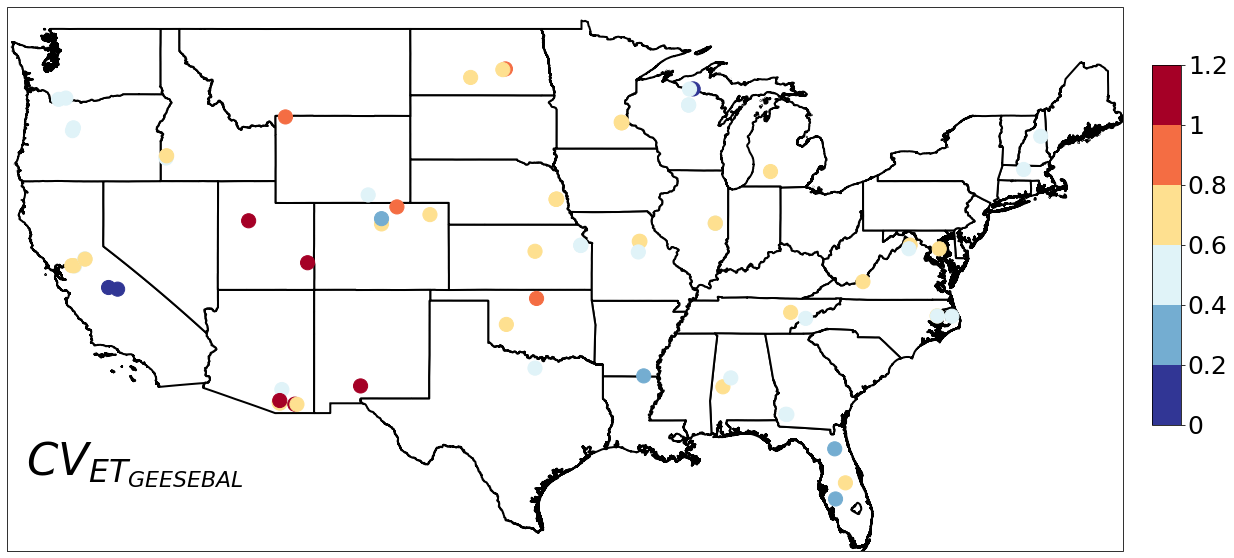

In [105]:
## Mean LE dailya
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,10))
gs1 = gridspec.GridSpec(1, 1)
axs.set_aspect("auto")
# axs[1].set_aspect("auto")
# axs[1,0].set_aspect("auto")
# axs[1,1].set_aspect("auto")
fig.subplots_adjust(wspace=0,hspace=0)
axs.add_geometries(us.geometry, ccrs.PlateCarree(), facecolor='white', edgecolor='black',linewidth=2)
axs.set_extent([-125, -67,25, 50], crs=ccrs.PlateCarree())
#--------------------------------
# define the bins and normalize
a=plt.cm.RdYlBu
cmap=a.reversed()
bounds = np.linspace(0,1.2,7)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# #---------------
p=axs.scatter(x=summary_df.lon, y=summary_df.lat,
            c=summary_df["CV_LE_sebal_daily"],
            s=200,
            alpha=1,transform=ccrs.PlateCarree(),zorder=2,cmap=cmap, norm=norm) ## Important
# p=axs[1].scatter(x=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Longitude, y=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Latitude,
#             c=cimis_80[cimis_80.p_Aero_PM_u<=0.05]['r_Aero_PM_u'],
#             s=200,
#             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # axs[1,0].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['Aero_PT'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # p=axs[1,1].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['ETo_SdB'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
ax2 = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cb = fig.colorbar(p,cax=ax2, cmap=cmap, norm=norm,
    ticks=bounds, boundaries=bounds)
ticklabels = [0,0.2,0.4,0.6,0.8,1,1.2]
cb.set_ticklabels(ticklabels,fontsize=25)
# #annotations 
axs.annotate("$CV_{ET_{GEESEBAL}}$",xy=(-124,28.5),fontsize=45,annotation_clip=False)
# #annotations 
# axs[0].annotate("(a) CIMIS PM",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# axs[1].annotate("(b) FAO-PM ",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# # axs[1,0].annotate("(c) ETo PT",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # axs[1,1].annotate("(d) ETo SdB",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # mpl.rcParams['axes.linewidth'] = 1
# # axs[0].annotate("Penman Monteith")
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 2
# [s.set_frame_on(False) for s in axs.flatten()]
# # plt.savefig('C:\\Rouhin_Lenovo\\US_project\\US_Project\\cimis_80\\Figures\\cimis_80_eto.png', bbox_inches='tight',dpi=300)

In [111]:
summary_df.columns

Index(['rn_bias', 'h_bias', 'le_bias', 'rn_rmse', 'h_rmse', 'le_rmse', 'lat',
       'lon', 'elev', 'veg', 'clim', 'MAP', 'MAT', 'LE_shape', 'H_shape',
       'G_shape', 'netrad_shape', 'LE_daily_bias', 'LE_daily_rmse',
       'Rn_daily_bias', 'Rn_daily_rmse', 'LE_daily_sebal_mean', 'LE_mean',
       'LE_daily_mean', 'LE_inst_sebal_mean', 'rn_mean', 'LE_daily_std',
       'LE_daily_sebal_std', 'CV_LE_daily', 'CV_LE_sebal_daily'],
      dtype='object')

array([-150., -100.,  -50.,    0.,   50.,  100.,  150.,  200.,  250.])

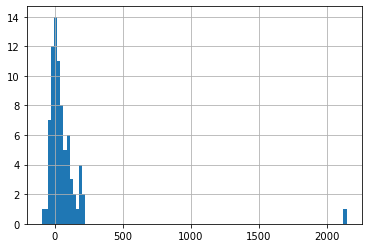

In [226]:
summary_df["LE_daily_bias"].hist(bins=100)
np.linspace(-150,250,9)

Text(-124, 28.5, '$Bias_{ET}$ (%) ')

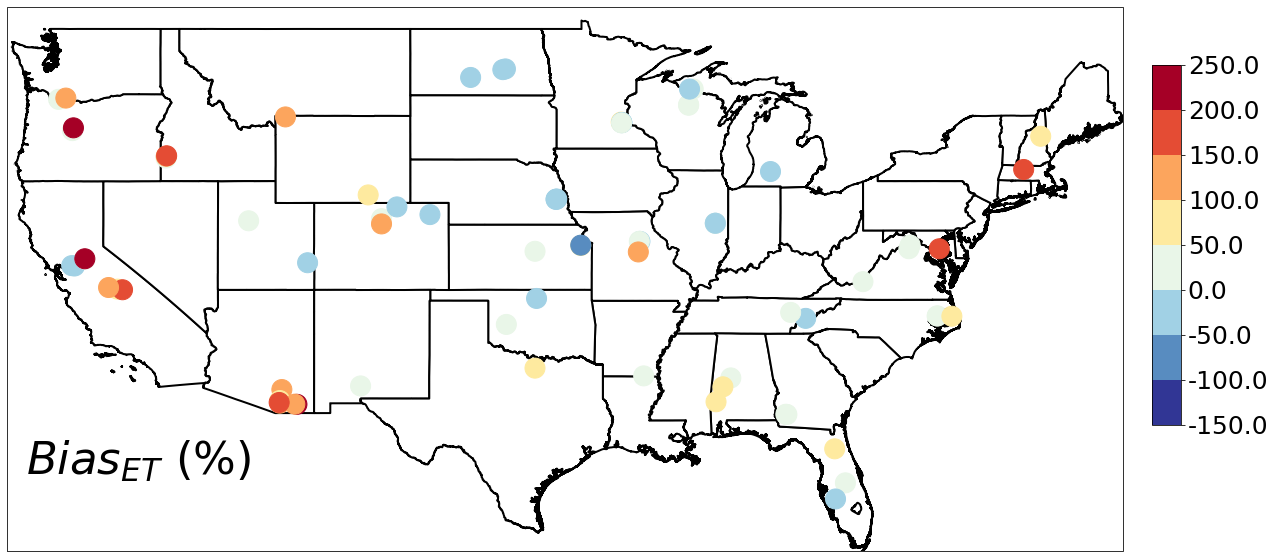

In [227]:
## Mean LE dailya
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,10))
gs1 = gridspec.GridSpec(1, 1)
axs.set_aspect("auto")
# axs[1].set_aspect("auto")
# axs[1,0].set_aspect("auto")
# axs[1,1].set_aspect("auto")
fig.subplots_adjust(wspace=0,hspace=0)
axs.add_geometries(us.geometry, ccrs.PlateCarree(), facecolor='white', edgecolor='black',linewidth=2)
axs.set_extent([-125, -67,25, 50], crs=ccrs.PlateCarree())
#--------------------------------
# define the bins and normalize
a=plt.cm.RdYlBu
cmap=a.reversed()
bounds = np.linspace(-150,250,9)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# #---------------
p=axs.scatter(x=summary_df.lon, y=summary_df.lat,
            c=summary_df["LE_daily_bias"],
            s=400,
            alpha=1,transform=ccrs.PlateCarree(),zorder=2,cmap=cmap, norm=norm) ## Important
# p=axs[1].scatter(x=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Longitude, y=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Latitude,
#             c=cimis_80[cimis_80.p_Aero_PM_u<=0.05]['r_Aero_PM_u'],
#             s=200,
#             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # axs[1,0].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['Aero_PT'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # p=axs[1,1].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['ETo_SdB'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
ax2 = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cb = fig.colorbar(p,cax=ax2, cmap=cmap, norm=norm,
    ticks=bounds, boundaries=bounds)
ticklabels = np.linspace(-150,250,9)
cb.set_ticklabels(ticklabels,fontsize=25)
# #annotations 
axs.annotate("$Bias_{ET}$ (%) ",xy=(-124,28.5),fontsize=45,annotation_clip=False)
# #annotations 
# axs[0].annotate("(a) CIMIS PM",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# axs[1].annotate("(b) FAO-PM ",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# # axs[1,0].annotate("(c) ETo PT",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # axs[1,1].annotate("(d) ETo SdB",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # mpl.rcParams['axes.linewidth'] = 1
# # axs[0].annotate("Penman Monteith")
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 2
# [s.set_frame_on(False) for s in axs.flatten()]
# # plt.savefig('C:\\Rouhin_Lenovo\\US_project\\US_Project\\cimis_80\\Figures\\cimis_80_eto.png', bbox_inches='tight',dpi=300)

In [134]:
summary_df["LE_daily_rmse"].describe()
np.linspace(0.5,4,8)

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

Text(-124, 28.5, '$RMSE_{ET}$ (mm/day)')

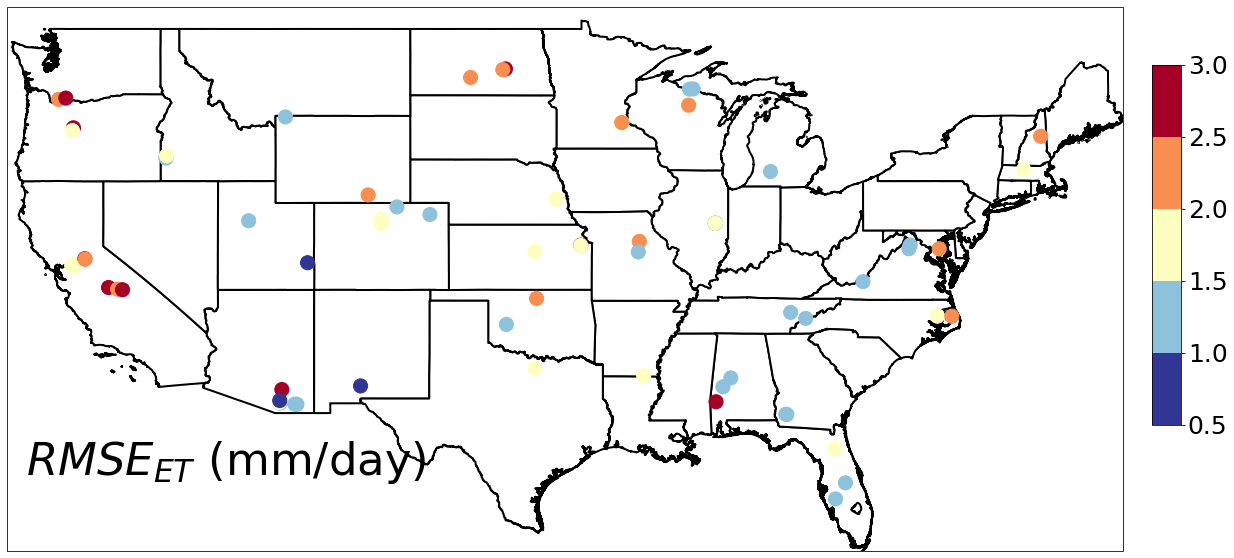

In [139]:
## Mean LE dailya
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,10))
gs1 = gridspec.GridSpec(1, 1)
axs.set_aspect("auto")
# axs[1].set_aspect("auto")
# axs[1,0].set_aspect("auto")
# axs[1,1].set_aspect("auto")
fig.subplots_adjust(wspace=0,hspace=0)
axs.add_geometries(us.geometry, ccrs.PlateCarree(), facecolor='white', edgecolor='black',linewidth=2)
axs.set_extent([-125, -67,25, 50], crs=ccrs.PlateCarree())
#--------------------------------
# define the bins and normalize
a=plt.cm.RdYlBu
cmap=a.reversed()
bounds = np.linspace(0.5,3,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# #---------------
p=axs.scatter(x=summary_df.lon, y=summary_df.lat,
            c=summary_df["LE_daily_rmse"],
            s=200,
            alpha=1,transform=ccrs.PlateCarree(),zorder=2,cmap=cmap, norm=norm) ## Important
# p=axs[1].scatter(x=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Longitude, y=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Latitude,
#             c=cimis_80[cimis_80.p_Aero_PM_u<=0.05]['r_Aero_PM_u'],
#             s=200,
#             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # axs[1,0].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['Aero_PT'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # p=axs[1,1].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['ETo_SdB'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
ax2 = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cb = fig.colorbar(p,cax=ax2, cmap=cmap, norm=norm,
    ticks=bounds, boundaries=bounds)
ticklabels = np.linspace(0.5,3,6)
cb.set_ticklabels(ticklabels,fontsize=25)
# #annotations 
axs.annotate("$RMSE_{ET}$ (mm/day)",xy=(-124,28.5),fontsize=45,annotation_clip=False)
# #annotations 
# axs[0].annotate("(a) CIMIS PM",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# axs[1].annotate("(b) FAO-PM ",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# # axs[1,0].annotate("(c) ETo PT",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # axs[1,1].annotate("(d) ETo SdB",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # mpl.rcParams['axes.linewidth'] = 1
# # axs[0].annotate("Penman Monteith")
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 2
# [s.set_frame_on(False) for s in axs.flatten()]
# # plt.savefig('C:\\Rouhin_Lenovo\\US_project\\US_Project\\cimis_80\\Figures\\cimis_80_eto.png', bbox_inches='tight',dpi=300)

In [172]:
## Mean LE dailya
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,10))
gs1 = gridspec.GridSpec(1, 1)
axs.set_aspect("auto")
# axs[1].set_aspect("auto")
# axs[1,0].set_aspect("auto")
# axs[1,1].set_aspect("auto")
fig.subplots_adjust(wspace=0,hspace=0)
axs.add_geometries(us.geometry, ccrs.PlateCarree(), facecolor='white', edgecolor='black',linewidth=2)
axs.set_extent([-125, -67,25, 50], crs=ccrs.PlateCarree())
#--------------------------------
# define the bins and normalize
a=plt.cm.RdYlBu
cmap=a.reversed()
bounds = np.linspace(0.5,3,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# #---------------
p=axs.scatter(x=summary_df.lon, y=summary_df.lat,
            c=summary_df["LE_daily_rmse"],
            s=200,
            alpha=1,transform=ccrs.PlateCarree(),zorder=2,cmap=cmap, norm=norm) ## Important
# p=axs[1].scatter(x=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Longitude, y=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Latitude,
#             c=cimis_80[cimis_80.p_Aero_PM_u<=0.05]['r_Aero_PM_u'],
#             s=200,
#             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # axs[1,0].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['Aero_PT'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # p=axs[1,1].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['ETo_SdB'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
ax2 = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cb = fig.colorbar(p,cax=ax2, cmap=cmap, norm=norm,
    ticks=bounds, boundaries=bounds)
ticklabels = ["0.5,"1"]
cb.set_ticklabels(ticklabels,fontsize=25)
# #annotations 
axs.annotate("$RMSE_{ET}$ \n (mm/day) ",xy=(-68,26),fontsize=35,annotation_clip=False)
# #annotations 
# axs[0].annotate("(a) CIMIS PM",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# axs[1].annotate("(b) FAO-PM ",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# # axs[1,0].annotate("(c) ETo PT",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # axs[1,1].annotate("(d) ETo SdB",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # mpl.rcParams['axes.linewidth'] = 1
# # axs[0].annotate("Penman Monteith")
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 2
# [s.set_frame_on(False) for s in axs.flatten()]
# # plt.savefig('C:\\Rouhin_Lenovo\\US_project\\US_Project\\cimis_80\\Figures\\cimis_80_eto.png', bbox_inches='tight',dpi=300)

SyntaxError: unterminated string literal (detected at line 40) (Temp/ipykernel_25176/1975053047.py, line 40)

Text(-67, 25, '$RMSE_{GEESEBAL}$ \n(mm/day) ')

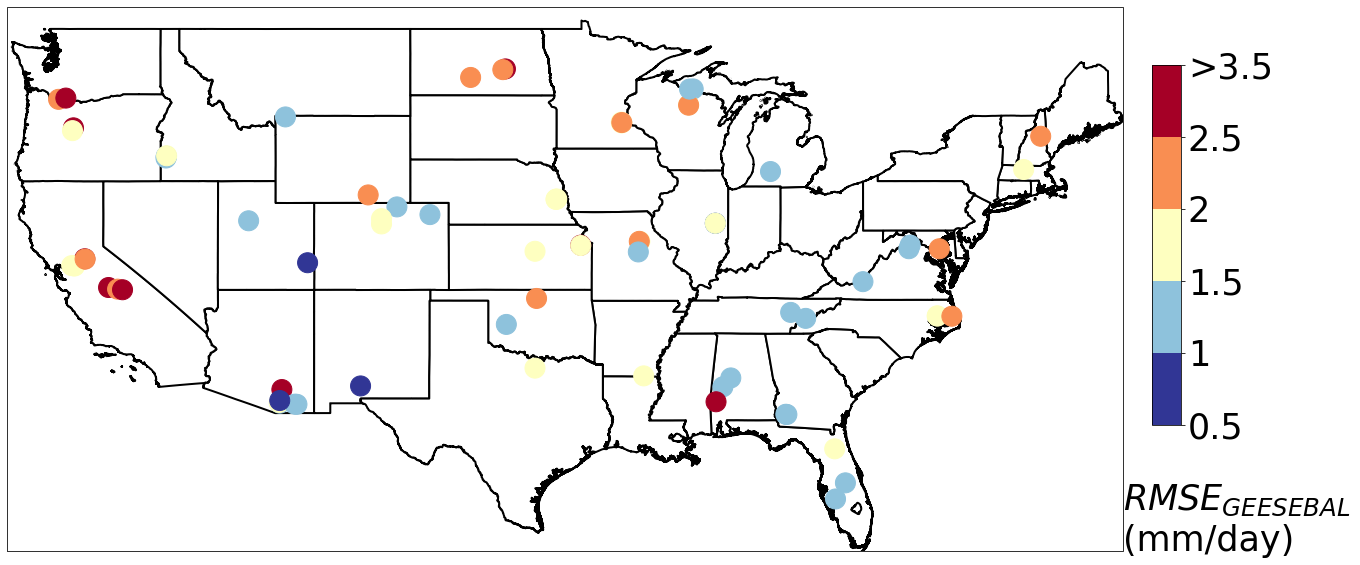

In [181]:
## Mean LE dailya
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,10))
gs1 = gridspec.GridSpec(1, 1)
axs.set_aspect("auto")
# axs[1].set_aspect("auto")
# axs[1,0].set_aspect("auto")
# axs[1,1].set_aspect("auto")
fig.subplots_adjust(wspace=0,hspace=0)
axs.add_geometries(us.geometry, ccrs.PlateCarree(), facecolor='white', edgecolor='black',linewidth=2)
axs.set_extent([-125, -67,25, 50], crs=ccrs.PlateCarree())
#--------------------------------
# define the bins and normalize
a=plt.cm.RdYlBu
cmap=a.reversed()
bounds = np.linspace(0.5,3,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# #---------------
p=axs.scatter(x=summary_df.lon, y=summary_df.lat,
            c=summary_df["LE_daily_rmse"],
            s=400,
            alpha=1,transform=ccrs.PlateCarree(),zorder=2,cmap=cmap, norm=norm) ## Important
# p=axs[1].scatter(x=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Longitude, y=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Latitude,
#             c=cimis_80[cimis_80.p_Aero_PM_u<=0.05]['r_Aero_PM_u'],
#             s=200,
#             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # axs[1,0].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['Aero_PT'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # p=axs[1,1].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['ETo_SdB'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
ax2 = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cb = fig.colorbar(p,cax=ax2, cmap=cmap, norm=norm,
    ticks=bounds, boundaries=bounds)
ticklabels = ["0.5","1","1.5","2","2.5",">3.5"]
cb.set_ticklabels(ticklabels,fontsize=35)
# #annotations 
axs.annotate("$RMSE_{GEESEBAL}$ \n(mm/day) ",xy=(-67,25),fontsize=35,annotation_clip=False)
# #annotations 
# axs[0].annotate("(a) CIMIS PM",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# axs[1].annotate("(b) FAO-PM ",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# # axs[1,0].annotate("(c) ETo PT",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # axs[1,1].annotate("(d) ETo SdB",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # mpl.rcParams['axes.linewidth'] = 1
# # axs[0].annotate("Penman Monteith")
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 2
# [s.set_frame_on(False) for s in axs.flatten()]
# # plt.savefig('C:\\Rouhin_Lenovo\\US_project\\US_Project\\cimis_80\\Figures\\cimis_80_eto.png', bbox_inches='tight',dpi=300)

In [219]:
summary_df["MAT"].describe()
np.linspace(0,20,6)

array([ 0.,  4.,  8., 12., 16., 20.])

Text(-124, 28.5, '$MAT$ (C) ')

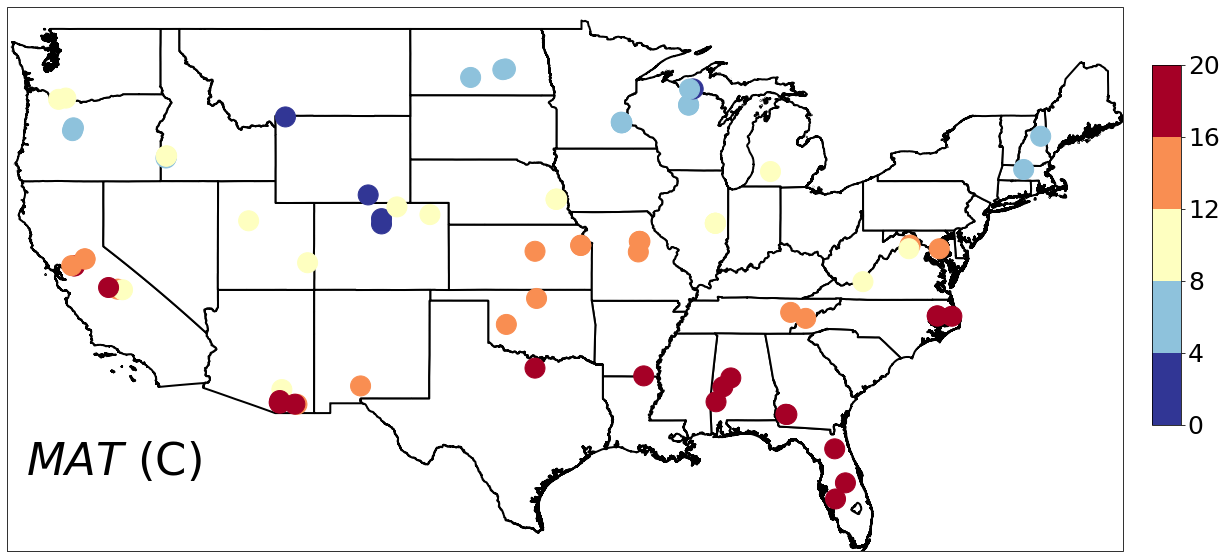

In [222]:
## Mean LE dailya
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,10))
gs1 = gridspec.GridSpec(1, 1)
axs.set_aspect("auto")
# axs[1].set_aspect("auto")
# axs[1,0].set_aspect("auto")
# axs[1,1].set_aspect("auto")
fig.subplots_adjust(wspace=0,hspace=0)
axs.add_geometries(us.geometry, ccrs.PlateCarree(), facecolor='white', edgecolor='black',linewidth=2)
axs.set_extent([-125, -67,25, 50], crs=ccrs.PlateCarree())
#--------------------------------
# define the bins and normalize
a=plt.cm.RdYlBu
cmap=a.reversed()
bounds = np.linspace(0,20,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# #---------------
p=axs.scatter(x=summary_df.lon, y=summary_df.lat,
            c=summary_df["MAT"],
            s=400,
            alpha=1,transform=ccrs.PlateCarree(),zorder=2,cmap=cmap, norm=norm) ## Important
# p=axs[1].scatter(x=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Longitude, y=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Latitude,
#             c=cimis_80[cimis_80.p_Aero_PM_u<=0.05]['r_Aero_PM_u'],
#             s=200,
#             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # axs[1,0].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['Aero_PT'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # p=axs[1,1].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['ETo_SdB'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
ax2 = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cb = fig.colorbar(p,cax=ax2, cmap=cmap, norm=norm,
    ticks=bounds, boundaries=bounds)
ticklabels = ["0","4","8","12","16","20"]
cb.set_ticklabels(ticklabels,fontsize=25)
# #annotations 
axs.annotate("$MAT$ (C) ",xy=(-124,28.5),fontsize=45,annotation_clip=False)
# #annotations 
# axs[0].annotate("(a) CIMIS PM",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# axs[1].annotate("(b) FAO-PM ",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# # axs[1,0].annotate("(c) ETo PT",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # axs[1,1].annotate("(d) ETo SdB",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # mpl.rcParams['axes.linewidth'] = 1
# # axs[0].annotate("Penman Monteith")
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 2
# [s.set_frame_on(False) for s in axs.flatten()]
# # plt.savefig('C:\\Rouhin_Lenovo\\US_project\\US_Project\\cimis_80\\Figures\\cimis_80_eto.png', bbox_inches='tight',dpi=300)

In [ ]:
## Mean LE dailya
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,10))
gs1 = gridspec.GridSpec(1, 1)
axs.set_aspect("auto")
# axs[1].set_aspect("auto")
# axs[1,0].set_aspect("auto")
# axs[1,1].set_aspect("auto")
fig.subplots_adjust(wspace=0,hspace=0)
axs.add_geometries(us.geometry, ccrs.PlateCarree(), facecolor='white', edgecolor='black',linewidth=2)
axs.set_extent([-125, -67,25, 50], crs=ccrs.PlateCarree())
#--------------------------------
# define the bins and normalize
a=plt.cm.RdYlBu
cmap=a.reversed()
bounds = np.linspace(250,1750,7)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# #---------------
p=axs.scatter(x=summary_df.lon, y=summary_df.lat,
            c=summary_df["MAP"],
            s=400,
            alpha=1,transform=ccrs.PlateCarree(),zorder=2,cmap=cmap, norm=norm) ## Important
# p=axs[1].scatter(x=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Longitude, y=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Latitude,
#             c=cimis_80[cimis_80.p_Aero_PM_u<=0.05]['r_Aero_PM_u'],
#             s=200,
#             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # axs[1,0].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['Aero_PT'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # p=axs[1,1].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['ETo_SdB'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
ax2 = fig.add_axes([0.92, 0.3, 0.02, 0.5])
cb = fig.colorbar(p,cax=ax2, cmap=cmap, norm=norm,
    ticks=bounds, boundaries=bounds)
ticklabels = np.linspace(250,1750,7)
cb.set_ticklabels(ticklabels,fontsize=25)
# #annotations 
axs.annotate("$MAT$ (C) ",xy=(-124,28.5),fontsize=45,annotation_clip=False)
# #annotations 
# axs[0].annotate("(a) CIMIS PM",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# axs[1].annotate("(b) FAO-PM ",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# # axs[1,0].annotate("(c) ETo PT",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # axs[1,1].annotate("(d) ETo SdB",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # mpl.rcParams['axes.linewidth'] = 1
# # axs[0].annotate("Penman Monteith")
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 2
# [s.set_frame_on(False) for s in axs.flatten()]
# # plt.savefig('C:\\Rouhin_Lenovo\\US_project\\US_Project\\cimis_80\\Figures\\cimis_80_eto.png', bbox_inches='tight',dpi=300)

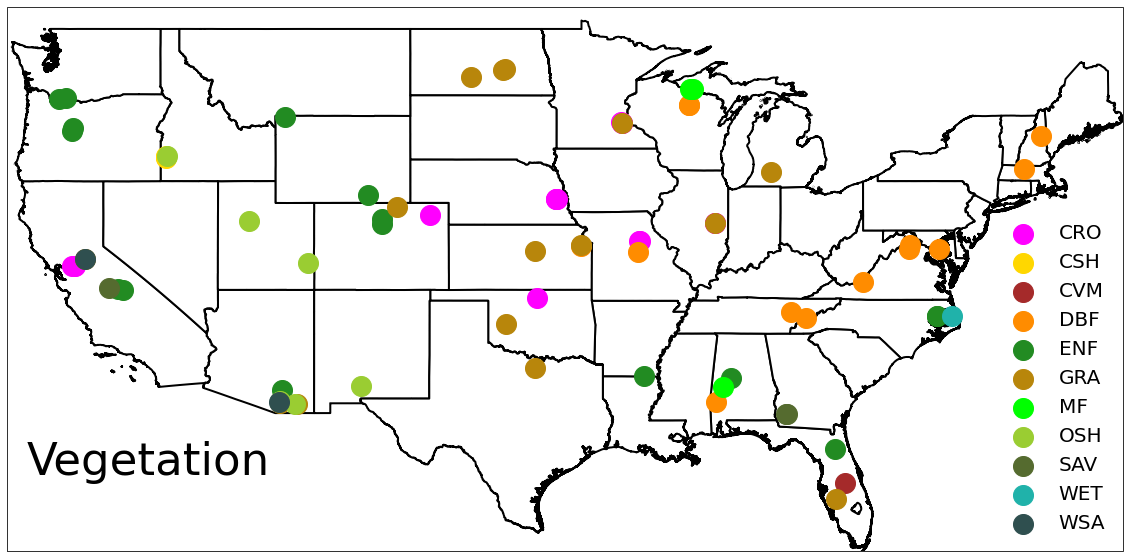

In [256]:
## Mean LE dailya
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,10))
gs1 = gridspec.GridSpec(1, 1)
axs.set_aspect("auto")
# axs[1].set_aspect("auto")
# axs[1,0].set_aspect("auto")
# axs[1,1].set_aspect("auto")
fig.subplots_adjust(wspace=0,hspace=0)
axs.add_geometries(us.geometry, ccrs.PlateCarree(), facecolor='white', edgecolor='black',linewidth=2)
axs.set_extent([-125, -67,25, 50], crs=ccrs.PlateCarree())
#--------------------------------
# define the bins and normalize
a=plt.cm.RdYlBu
cmap=a.reversed()
bounds = np.linspace(0,20,6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
colors=["magenta","gold","brown","darkorange","forestgreen","darkgoldenrod","lime","yellowgreen","darkolivegreen","lightseagreen","darkslategray"]

for j,i in enumerate(summary_df.veg.unique()[~pd.isnull(summary_df.veg.unique())]):
    # #---------------
    p=axs.scatter(x=summary_df[summary_df.veg==i].lon, y=summary_df[summary_df.veg==i].lat,
                c=colors[j],
                s=400,
                alpha=1,transform=ccrs.PlateCarree(),zorder=2,label=i) ## Important
# p=axs[1].scatter(x=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Longitude, y=cimis_80[cimis_80.p_Aero_PM_u<=0.05].Latitude,
#             c=cimis_80[cimis_80.p_Aero_PM_u<=0.05]['r_Aero_PM_u'],
#             s=200,
#             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # axs[1,0].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['Aero_PT'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# # p=axs[1,1].scatter(x=cimis_80.Longitude, y=cimis_80.Latitude,
# #             c=cimis_80['ETo_SdB'],
# #             s=200,
# #             alpha=1,transform=ccrs.PlateCarree(),zorder=3,cmap=cmap, norm=norm) ## Important
# ax2 = fig.add_axes([0.92, 0.3, 0.02, 0.5])
# cb = fig.colorbar(p,cax=ax2, cmap=cmap, norm=norm,
#     ticks=bounds, boundaries=bounds)
# ticklabels = ["0","4","8","12","16","20"]
# cb.set_ticklabels(ticklabels,fontsize=25)
# #annotations 
axs.annotate("Vegetation",xy=(-124,28.5),fontsize=45,annotation_clip=False)
axs.legend(fontsize=20,frameon=False)
# #annotations 
# axs[0].annotate("(a) CIMIS PM",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# axs[1].annotate("(b) FAO-PM ",xy=(-123.8,42.5),fontsize=35,annotation_clip=False)
# # axs[1,0].annotate("(c) ETo PT",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # axs[1,1].annotate("(d) ETo SdB",xy=(-123,42.5),fontsize=35,annotation_clip=False)
# # mpl.rcParams['axes.linewidth'] = 1
# # axs[0].annotate("Penman Monteith")
# plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 2
# [s.set_frame_on(False) for s in axs.flatten()]
# # plt.savefig('C:\\Rouhin_Lenovo\\US_project\\US_Project\\cimis_80\\Figures\\cimis_80_eto.png', bbox_inches='tight',dpi=300)

In [258]:
summary_df.veg.unique()[~pd.isnull(summary_df.veg.unique())]
pd.set_option('display.max_columns', None)
summary_df.corr()

,rn_bias,h_bias,le_bias,rn_rmse,h_rmse,le_rmse,lat,lon,elev,MAP,MAT,LE_shape,H_shape,G_shape,netrad_shape,LE_daily_bias,LE_daily_rmse,Rn_daily_bias,Rn_daily_rmse,LE_daily_sebal_mean,LE_mean,LE_daily_mean,LE_inst_sebal_mean,rn_mean,LE_daily_std,LE_daily_sebal_std,CV_LE_daily,CV_LE_sebal_daily,le_daily_r_squared
rn_bias,1.000000,-0.088750,0.050775,0.524232,0.001712,0.086503,0.181738,-0.016997,0.173252,-0.076472,-0.215240,-0.216981,-0.217303,-0.212650,-0.218646,-0.053430,0.043800,0.222926,0.191696,0.050526,-0.046072,-0.039328,0.004570,-0.322021,-0.127732,-0.026536,-0.125343,-0.141480,-0.187785
h_bias,-0.088750,1.000000,-0.186348,-0.157878,-0.145001,-0.413544,0.304832,-0.101545,-0.022232,-0.334650,-0.238296,0.014036,0.017140,0.026171,0.028541,-0.103630,-0.177550,0.129843,-0.088935,-0.385754,0.165864,0.061959,-0.394911,-0.261650,0.106418,-0.150872,0.059347,0.263209,0.090435
le_bias,0.050775,-0.186348,1.000000,-0.157451,0.366344,0.646436,-0.016421,0.134497,0.066140,0.317644,-0.068088,-0.165943,-0.167212,-0.176465,-0.171062,0.220445,0.314964,-0.073294,-0.210320,0.487503,-0.106647,-0.073251,0.573296,0.263741,-0.067942,0.324127,-0.060492,-0.220153,-0.120160
rn_rmse,0.524232,-0.157878,-0.157451,1.000000,0.026036,-0.095996,-0.089368,-0.241585,0.271191,-0.182417,0.009035,0.035105,0.034483,0.034065,0.032405,0.003633,0.097834,0.092822,0.439131,-0.026293,-0.067742,-0.065771,-0.134457,-0.106871,-0.215136,-0.143823,-0.189592,-0.137447,-0.386481
h_rmse,0.001712,-0.145001,0.366344,0.026036,1.000000,0.505498,0.151294,0.009244,-0.021213,0.297167,-0.143250,0.014961,0.013621,0.014794,0.016378,0.127928,0.566312,-0.157679,-0.202285,0.296153,0.115325,0.057806,0.371882,0.257387,0.046445,0.528221,-0.033092,-0.118821,0.068412
le_rmse,0.086503,-0.413544,0.646436,-0.095996,0.505498,1.000000,-0.056934,0.212544,-0.119837,0.610240,0.022016,-0.234055,-0.238129,-0.243707,-0.243545,0.086320,0.653409,-0.298896,-0.314280,0.792017,0.092047,0.209328,0.840908,0.503817,0.052003,0.487607,-0.273532,-0.533081,-0.223563
lat,0.181738,0.304832,-0.016421,-0.089368,0.151294,-0.056934,1.000000,-0.159379,0.115927,-0.110967,-0.866815,-0.151730,-0.150926,-0.146965,-0.145213,-0.048968,0.255360,0.096618,0.003018,-0.062255,0.146569,0.159324,-0.132577,-0.118098,0.134047,0.132785,-0.093862,0.003945,0.108341
lon,-0.016997,-0.101545,0.134497,-0.241585,0.009244,0.212544,-0.159379,1.000000,-0.482096,0.462949,0.138112,-0.374642,-0.376784,-0.375818,-0.373294,-0.228913,-0.277414,-0.460464,-0.449892,0.088773,0.445967,0.431390,0.350427,-0.048179,0.370918,0.208242,-0.125980,-0.145305,0.133776
elev,0.173252,-0.022232,0.066140,0.271191,-0.021213,-0.119837,0.115927,-0.482096,1.000000,-0.356188,-0.504608,-0.058113,-0.055314,-0.052549,-0.060323,0.015114,0.040126,0.552401,0.525722,-0.051448,-0.440896,-0.410286,-0.228920,0.239047,-0.402599,-0.161743,-0.001920,0.167060,0.064593
MAP,-0.076472,-0.334650,0.317644,-0.182417,0.297167,0.610240,-0.110967,0.462949,-0.356188,1.000000,0.157595,-0.311998,-0.316265,-0.312313,-0.317622,-0.080496,0.237774,-0.577707,-0.512207,0.598026,0.371678,0.388218,0.720497,0.318581,0.198489,0.555714,-0.282975,-0.406792,0.042692


In [ ]:
#### 